In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, \
    f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

In [147]:
df = pd.read_csv('BankChurners.csv')
print("df.shape: ", df.shape)
df.head()

df.shape:  (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


- **고객id**
  - **Clientnum**: Client number. Unique identifier for the customer holding the account

- **Target/Label**
  - **Attrition_flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0

- **인구통계학적 feature**
  - **Age**: Demographic variable - Customer's age
  - **Gender**: Demographic variable - M=Male, F=Female
  - **Dependent_count**: Demographic variable - Number of dependents (부양가족 수)
  - **Education_level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
  - **Marital_status**: Demographic variable - Married, Single, Divorced, Unknown
  - **Income_category**: Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)

- **제품 관련 feature**
  - **Card_category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
  - **Months_on_book**: Period of relationship with bank
  - **Total_relationship_count**: Total no. of products held by the customer (ex: Credit Card, Savings account, etc.)
  - **Months_inactive_12_mon**: No. of months inactive in the last 12 months
  - **Contacts_count_12_mon**: No. of Contacts in the last 12 months
  - **Credit_limit**: Credit Limit on the Credit Card
  - **Total_revolving_bal**: Total Revolving Balance on the Credit Card
  - **Avg_open_to_buy**: Open to Buy Credit Line (Average of last 12 months)
  - **Total_amt_chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
  - **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
  - **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
  - **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)
  - **Avg_Utilization_Ratio**: Average Card Utilization Ratio

- **사용하지 않는 feature:**
  - **Naive_Bayes_Classifier_Attrition_Flag**: Document said 'PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING'


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [149]:
# null값 확인
df.isnull().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

In [150]:
# 중복값이 있는지 검사 (client id 등)
df.duplicated().any()

False

In [151]:
# 의미없는 행 제거
df = df.iloc[:, 1:-2]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [152]:
#TODO: flag 변수에 대해 추후 미세한 조정 필요

num_cols = df.select_dtypes(include=np.number).columns.to_list()
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("num_cols: ", num_cols)
print("cat_cols: ", cat_cols)

num_cols:  ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
cat_cols:  ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


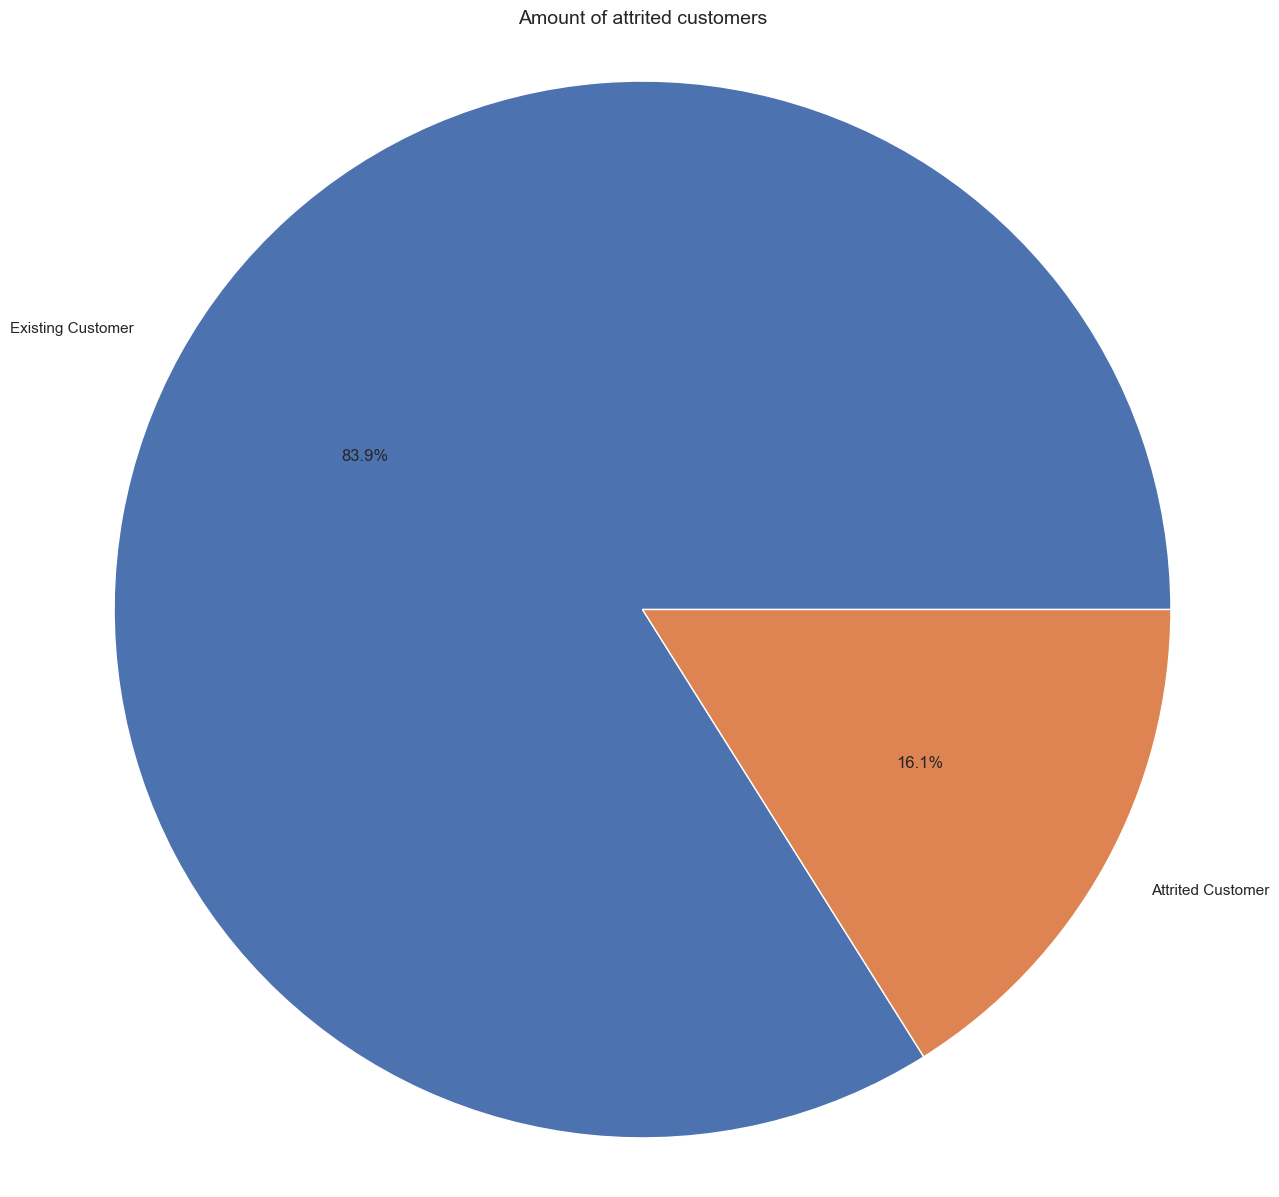

In [153]:
# 해당 분포로부터 class에 imbalance가 있는지 확인할 수 있다 

target = df["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Amount of attrited customers", fontsize=14)
plt.show()

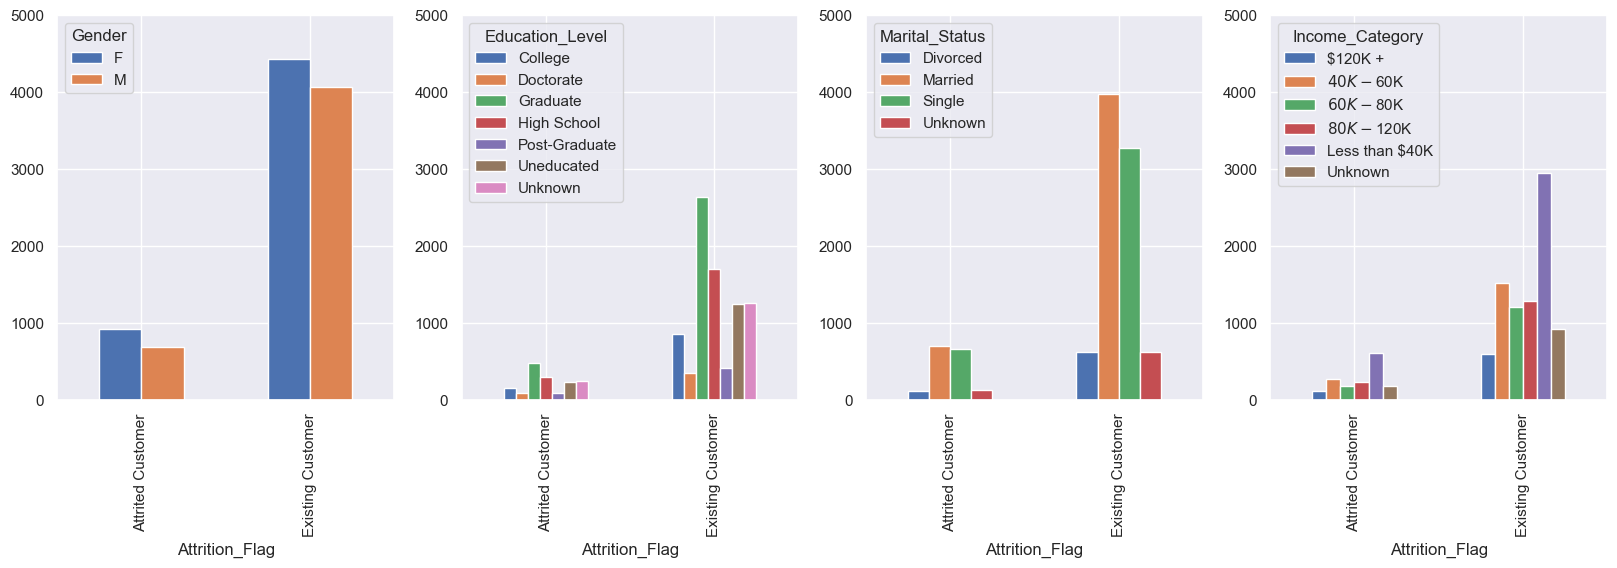

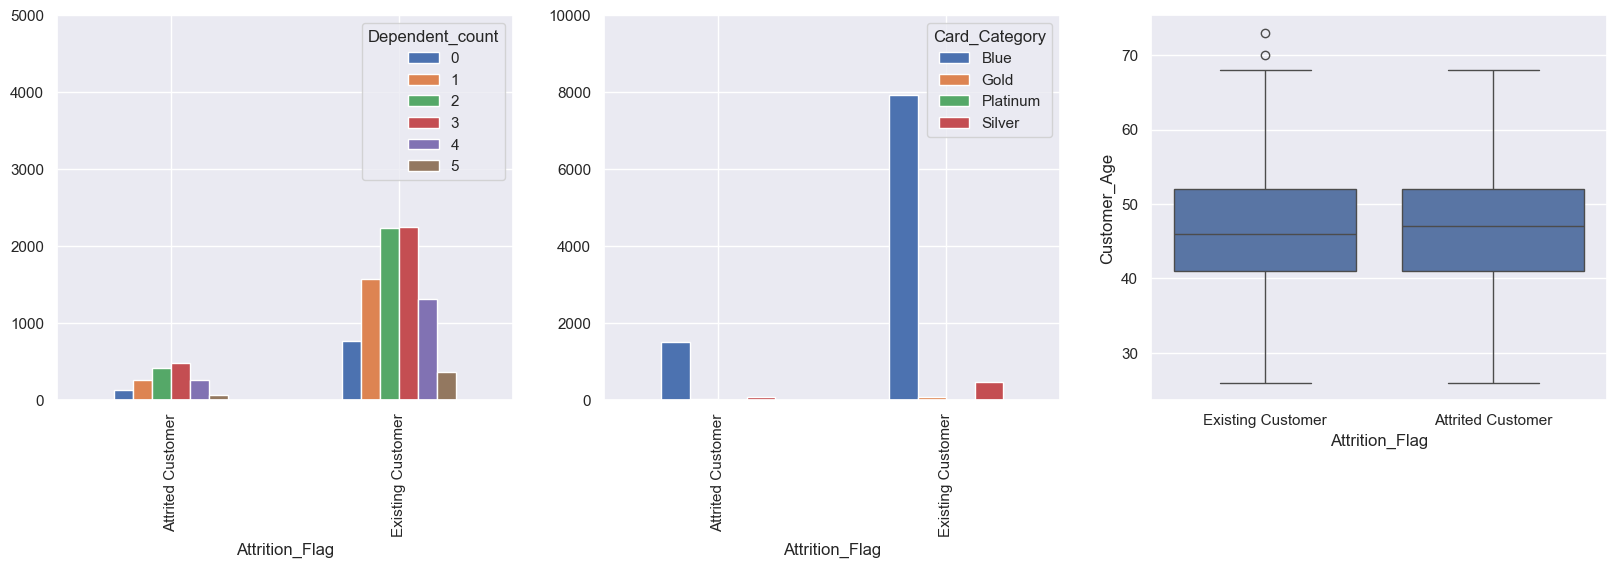

In [154]:
# 이탈유무에 따른 인구통계학적 특징 분석
# 인구통계학적 특징 분포는 이탈유무와 상관없이 대체로 비슷한 분포를 나타낸다

fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
age_boxplot=sns.boxplot(data = df ,x='Attrition_Flag',y='Customer_Age', ax=ax3)

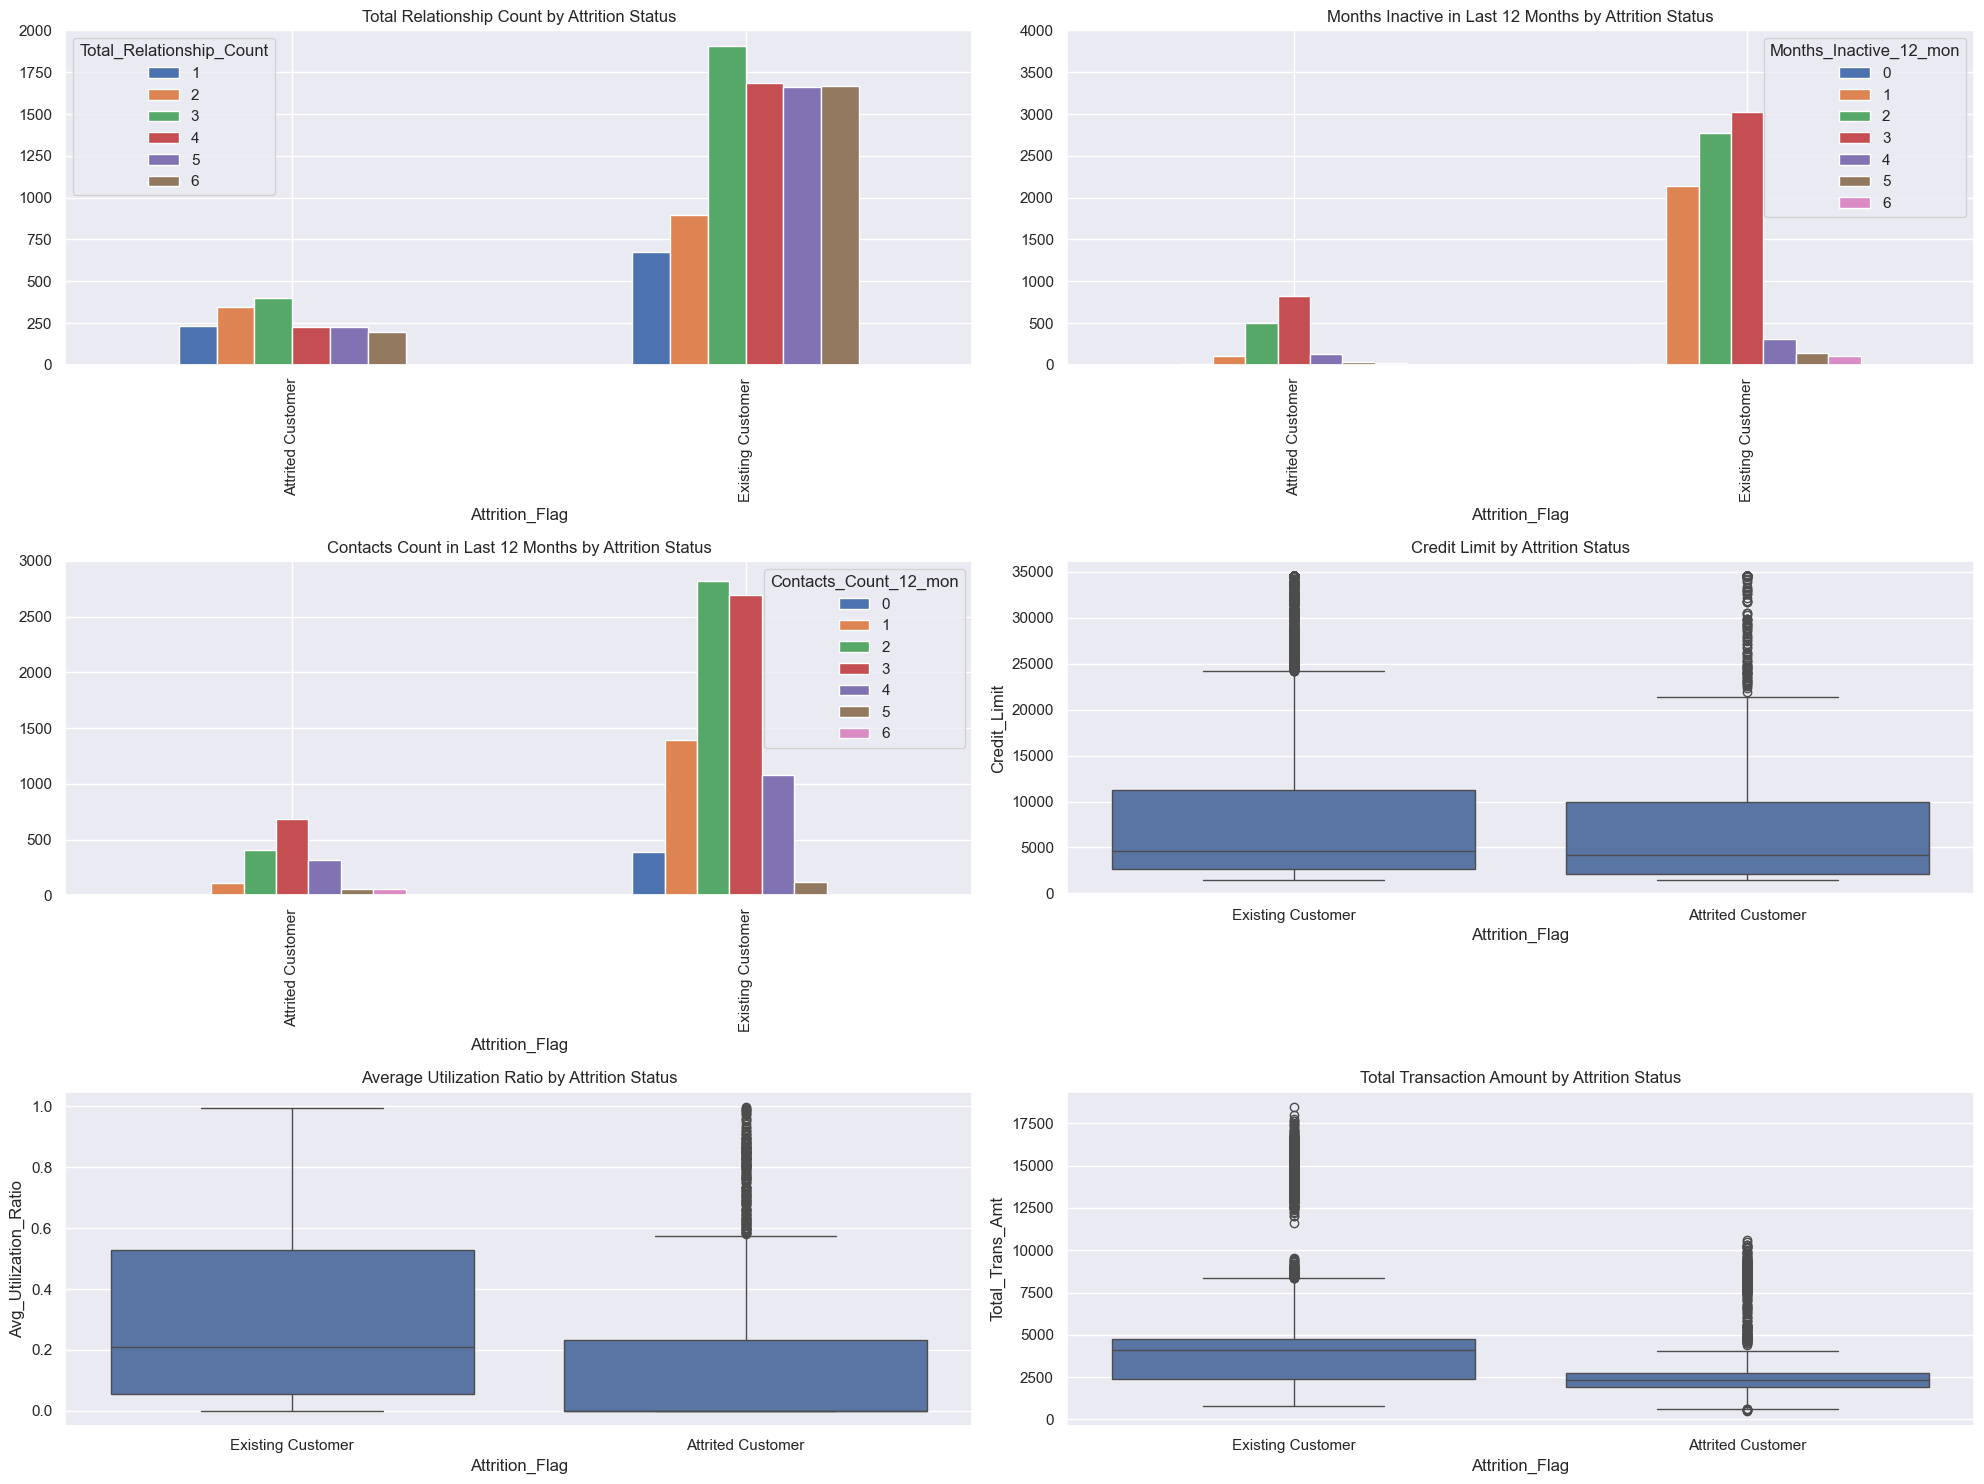

In [155]:
# product 관련 feture 분석1

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

pd.crosstab(df['Attrition_Flag'], df['Total_Relationship_Count']).plot(kind='bar', ax=axes[0, 0], title='Total Relationship Count by Attrition Status')
axes[0, 0].set_ylim([0, 2000])

pd.crosstab(df['Attrition_Flag'], df['Months_Inactive_12_mon']).plot(kind='bar', ax=axes[0, 1], title='Months Inactive in Last 12 Months by Attrition Status')
axes[0, 1].set_ylim([0, 4000])

pd.crosstab(df['Attrition_Flag'], df['Contacts_Count_12_mon']).plot(kind='bar', ax=axes[1, 0], title='Contacts Count in Last 12 Months by Attrition Status')
axes[1, 0].set_ylim([0, 3000])

sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Credit Limit by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Average Utilization Ratio by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Total Transaction Amount by Attrition Status')

plt.tight_layout()
plt.show()


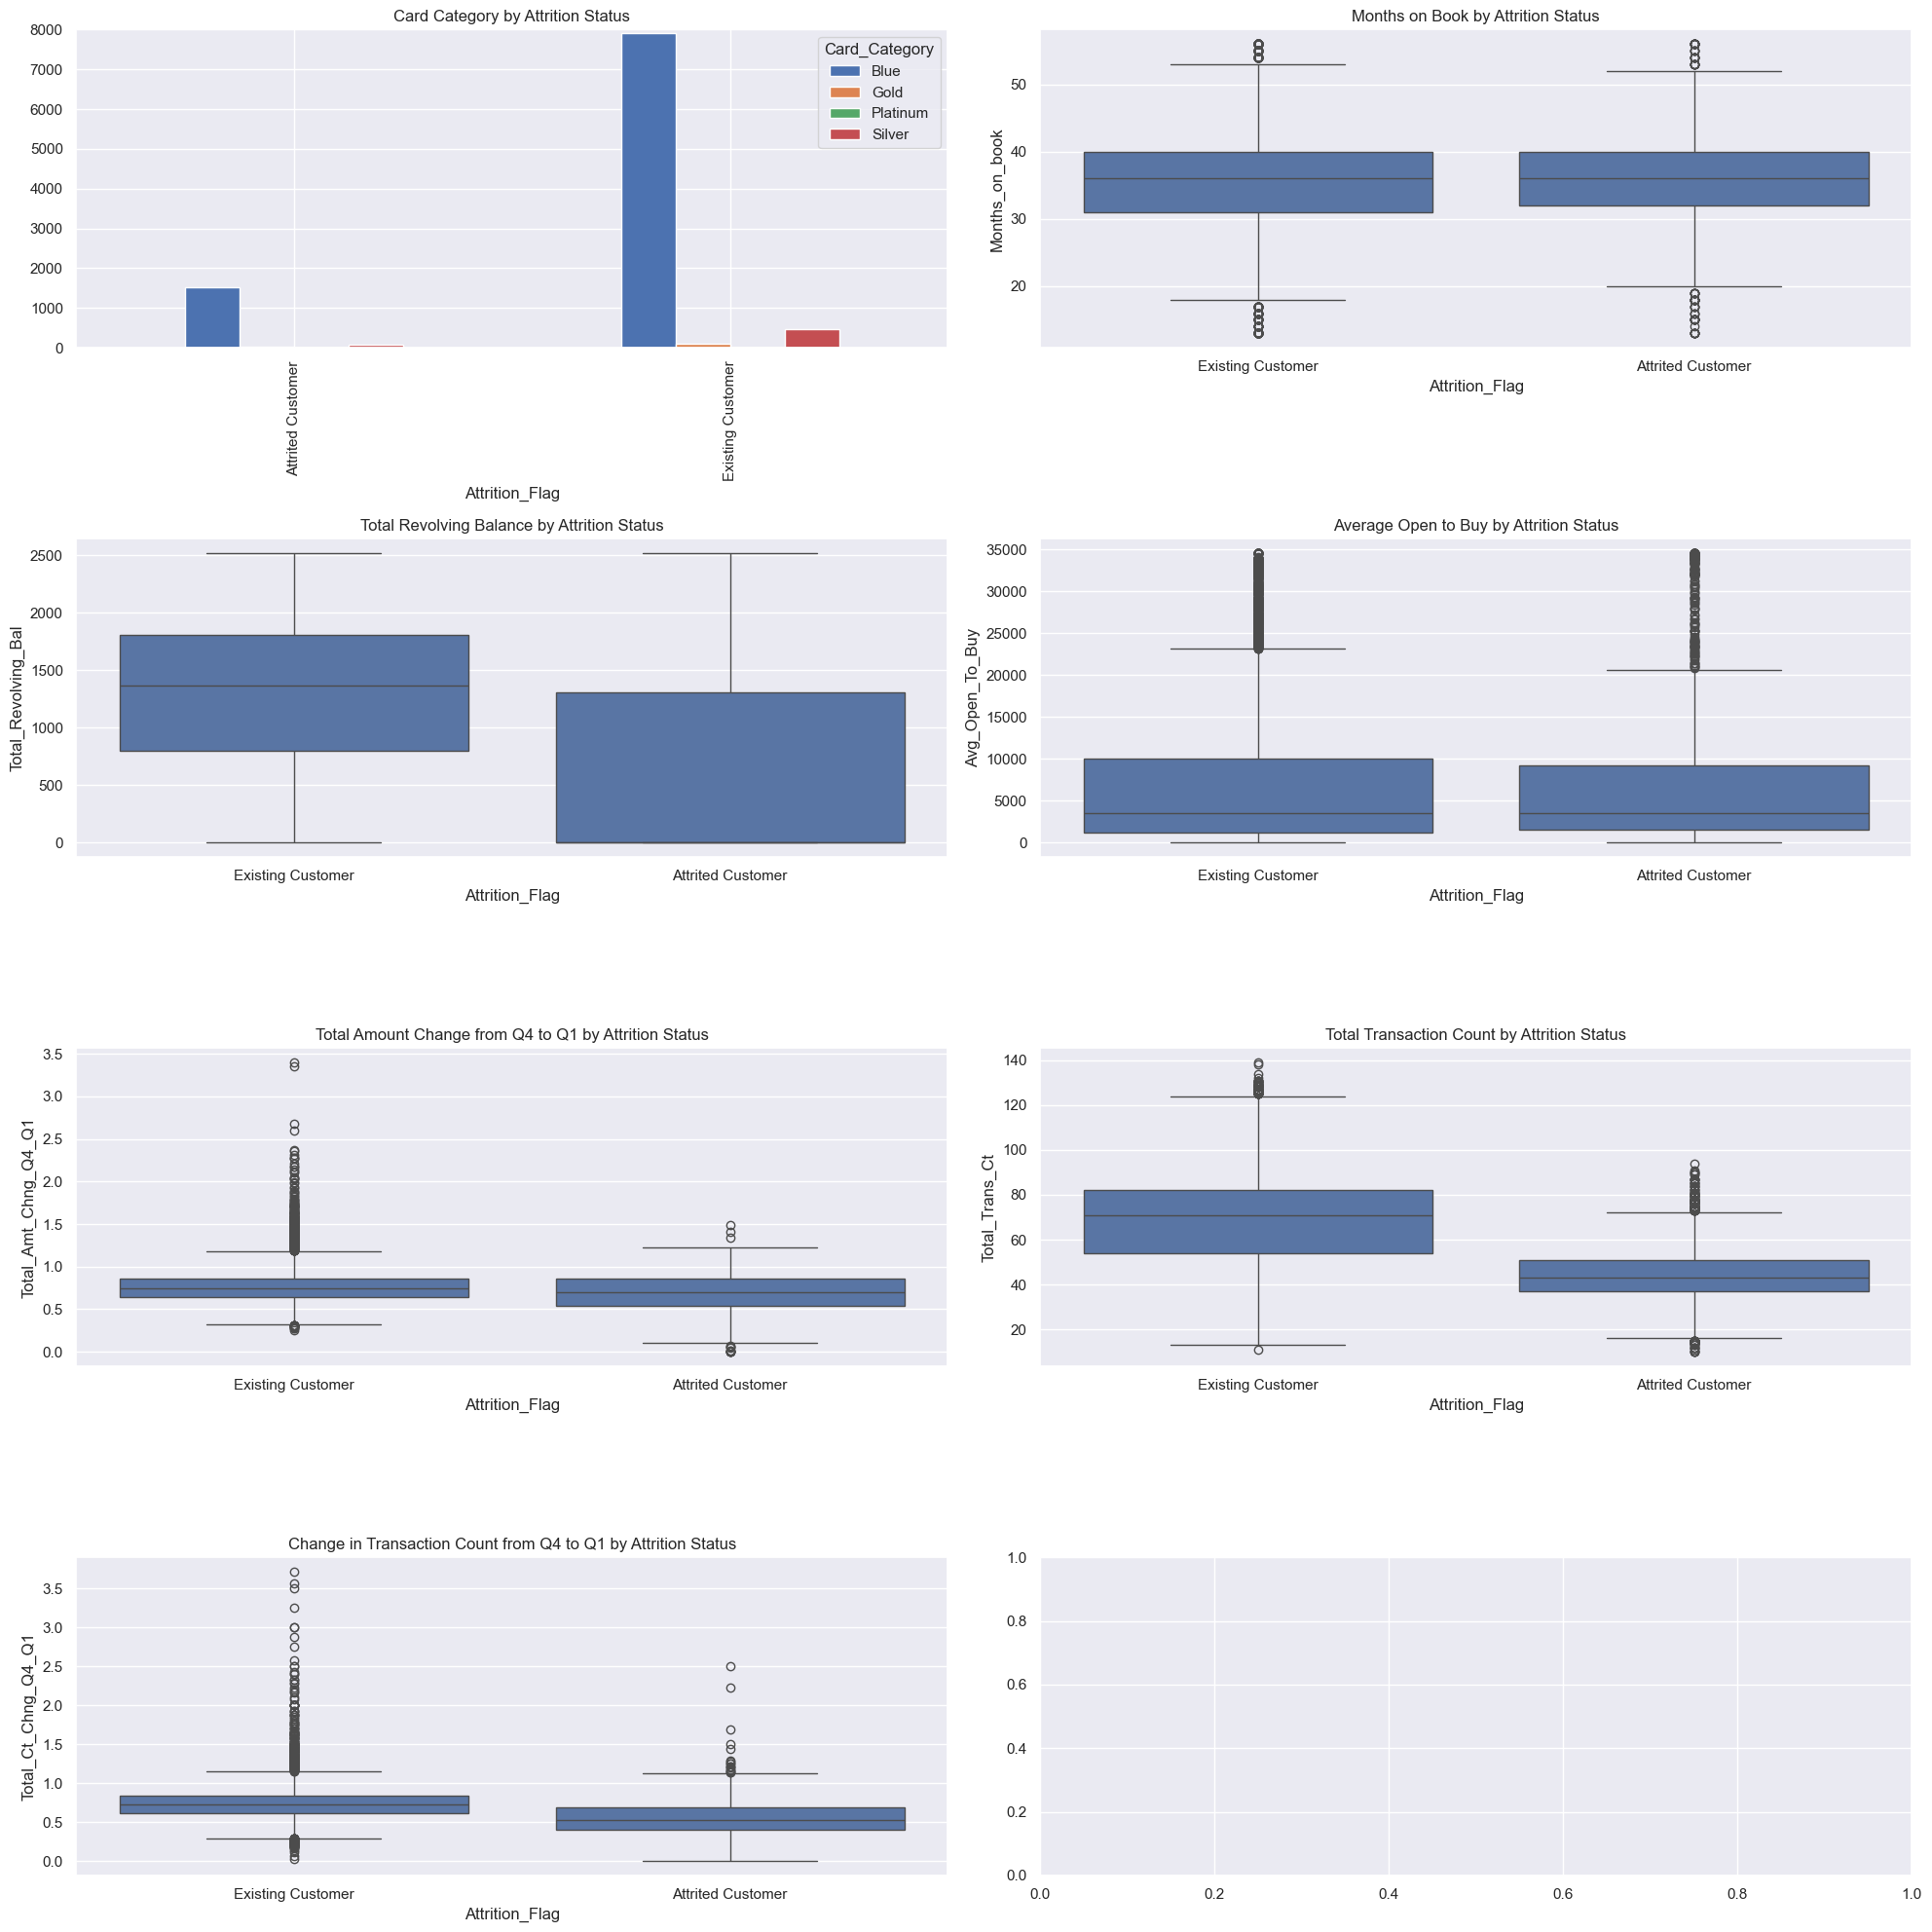

In [156]:
# product 관련 feture 분석2

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

pd.crosstab(df['Attrition_Flag'], df['Card_Category']).plot(kind='bar', ax=axes[0, 0], title='Card Category by Attrition Status')
axes[0, 0].set_ylim([0, 8000])

sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Months on Book by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Total Revolving Balance by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Average Open to Buy by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Total Amount Change from Q4 to Q1 by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Total Transaction Count by Attrition Status')

sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Change in Transaction Count from Q4 to Q1 by Attrition Status')

plt.tight_layout()
plt.show()

In [157]:
# plot을 위한 helper function

df_attrited = df[df['Attrition_Flag'] == "Attrited Customer"]
df_existing = df[df['Attrition_Flag'] == "Existing Customer"]

def plot_bar(column):
    if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
        order = np.union1d(df[column].unique(), df[column].unique())
        target = df[column].value_counts().reindex(order, fill_value=0)
    else:
        target = df[column].value_counts().sort_index()

    fig, ax = plt.subplots()
    ax.bar(range(len(target)), target.values, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xticks(range(len(target)))
    ax.set_xticklabels(target.index, rotation=45)
    plt.show()

def plot_compare(column):
    if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
        all_categories = np.union1d(df_attrited[column].unique(), df_existing[column].unique())
    else:
        all_categories = np.union1d(df_attrited[column].unique(), df_existing[column].unique())
        all_categories.sort()

    attrited_counts = df_attrited[column].value_counts().reindex(all_categories, fill_value=0)
    existing_counts = df_existing[column].value_counts().reindex(all_categories, fill_value=0)

    indices = np.arange(len(all_categories))

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    attrited_color = plt.cm.Reds(np.linspace(0.5, 1, len(indices)))
    existing_color = plt.cm.Blues(np.linspace(0.5, 1, len(indices)))

    axs[0].bar(indices, existing_counts, color=existing_color, edgecolor='black')
    axs[0].set_title(f'Existing customer {column}', fontsize=18)
    axs[0].set_xticks(indices)
    axs[0].set_xticklabels(all_categories, rotation=45, fontsize=12)
    axs[0].set_ylabel('Count', fontsize=14)

    axs[1].bar(indices, attrited_counts, color=attrited_color, edgecolor='black')
    axs[1].set_title(f'Attrited customer {column}', fontsize=18)
    axs[1].set_xticks(indices)
    axs[1].set_xticklabels(all_categories, rotation=45, fontsize=12)

    plt.tight_layout()
    plt.show()

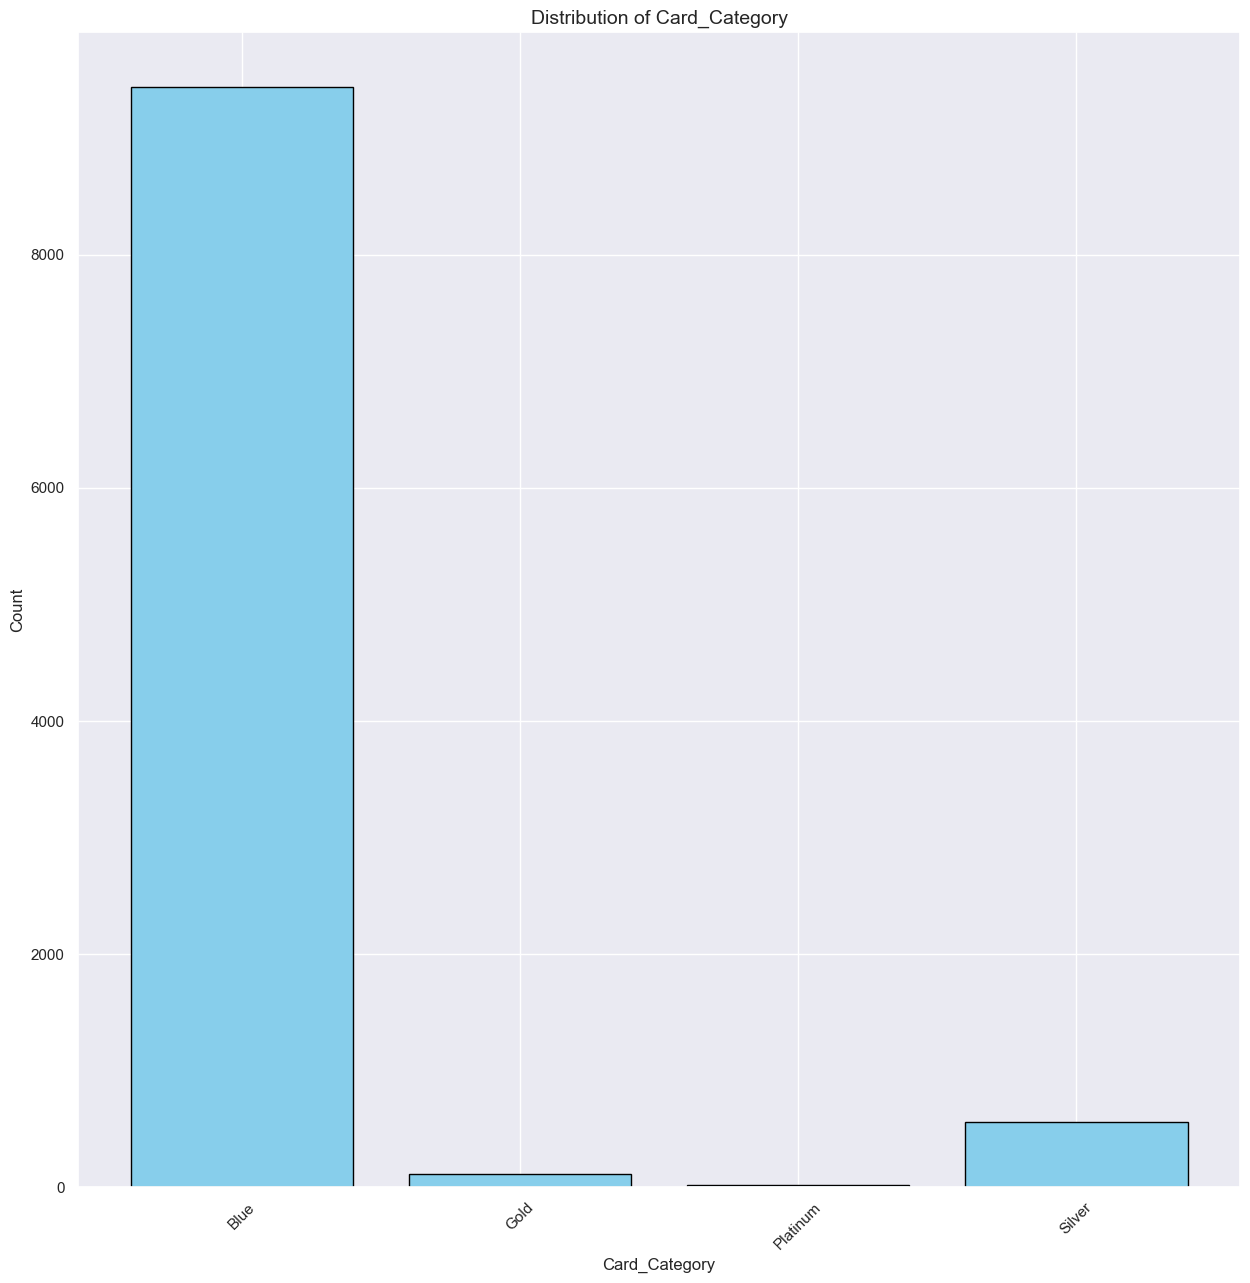

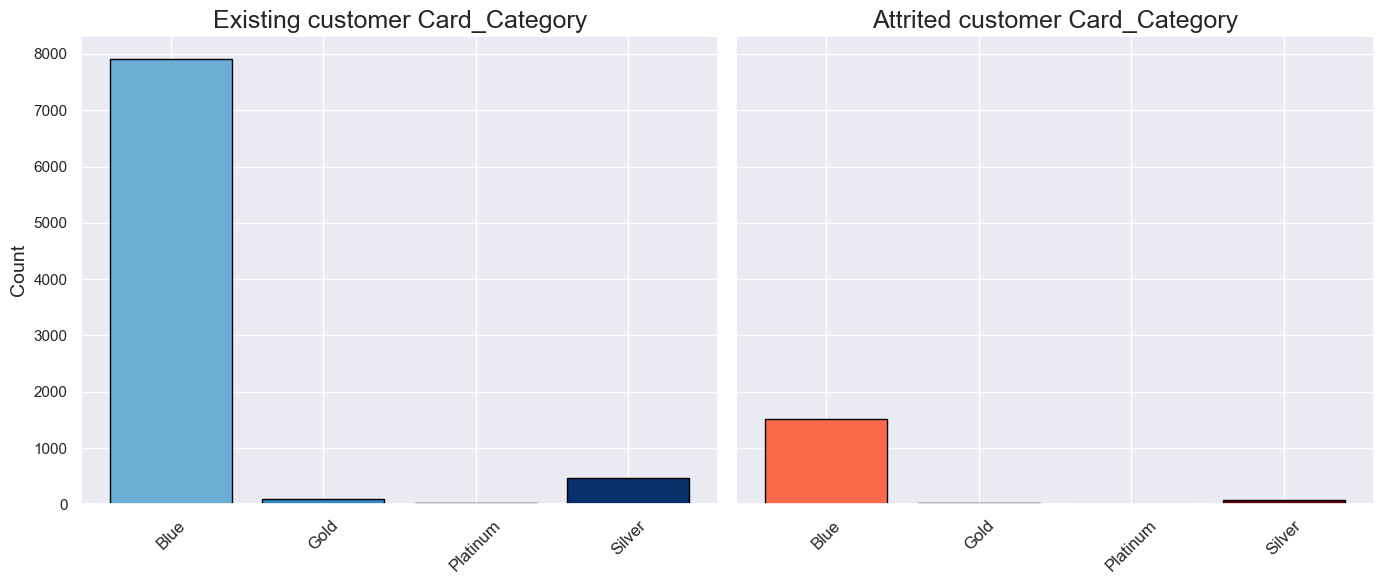

In [158]:
# 카드 카테고리 분포 비다
# existing, attrited 두 그룹에서 카드 카테고리 분포는 유사하다

plot_bar("Card_Category")
plot_compare("Card_Category")

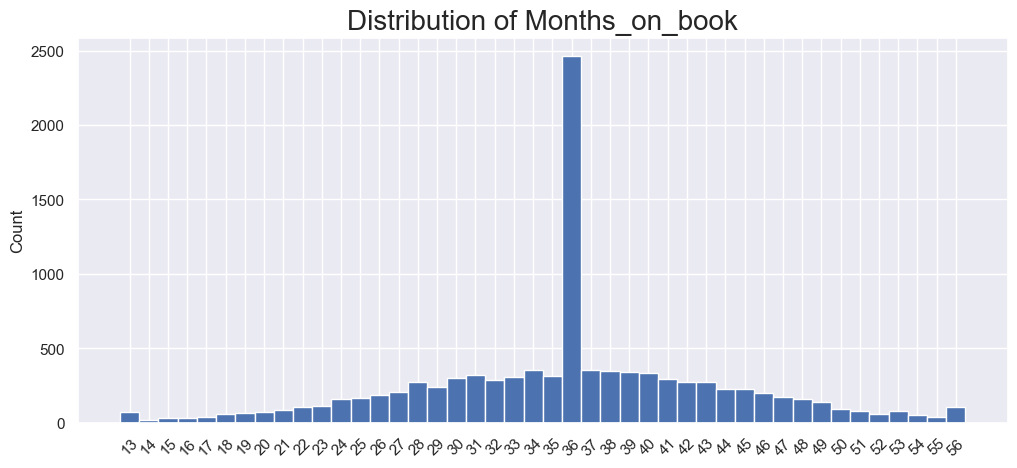

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:23: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


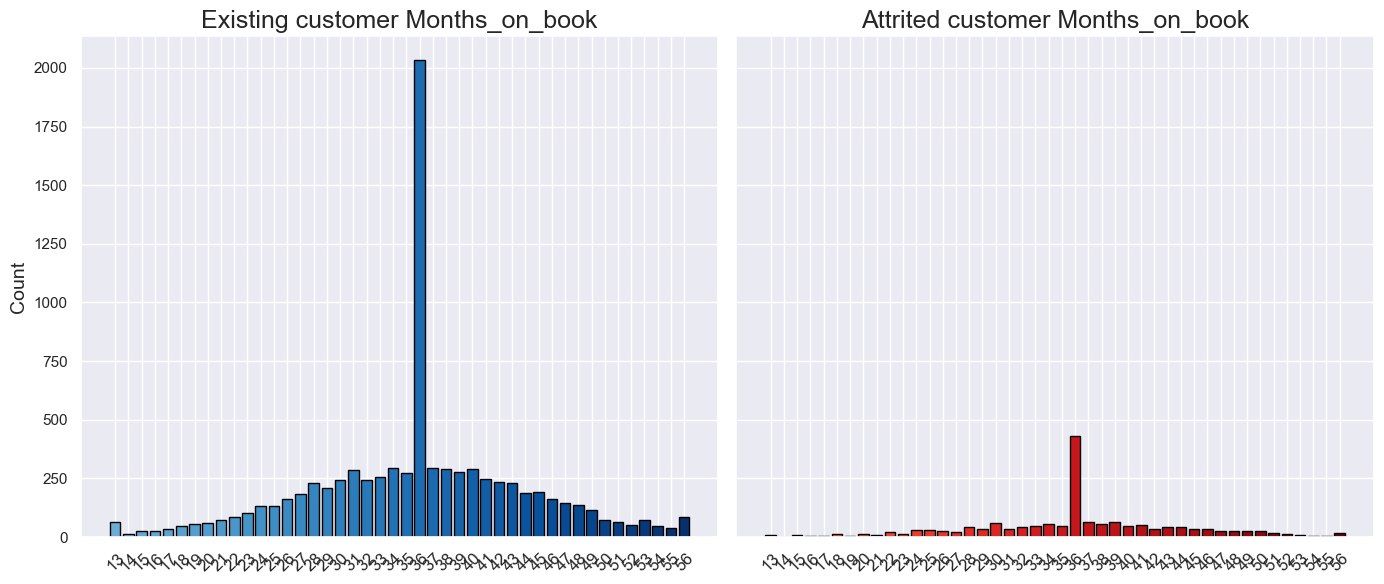

In [159]:
# months_on_book도 크게 드러나는 차이는 없다

column = "Months_on_book"

N = len(df[column].unique())
DataCounts = df[column].value_counts().sort_index()

ind = np.arange(N) 
width = 1       

figs, axs = plt.subplots(figsize=(12,5))

axs.bar(ind, DataCounts, width)
axs.set_ylabel('Count')
axs.set_title('Distribution of Months_on_book', fontsize=20)
axs.set_xticks(ind)
axs.set_xticklabels(DataCounts.index.tolist(), rotation=45)

plt.show()
plot_compare("Months_on_book")

Text(0.5, 1.0, 'Boxplot of Months_on_Book by Customer Status')

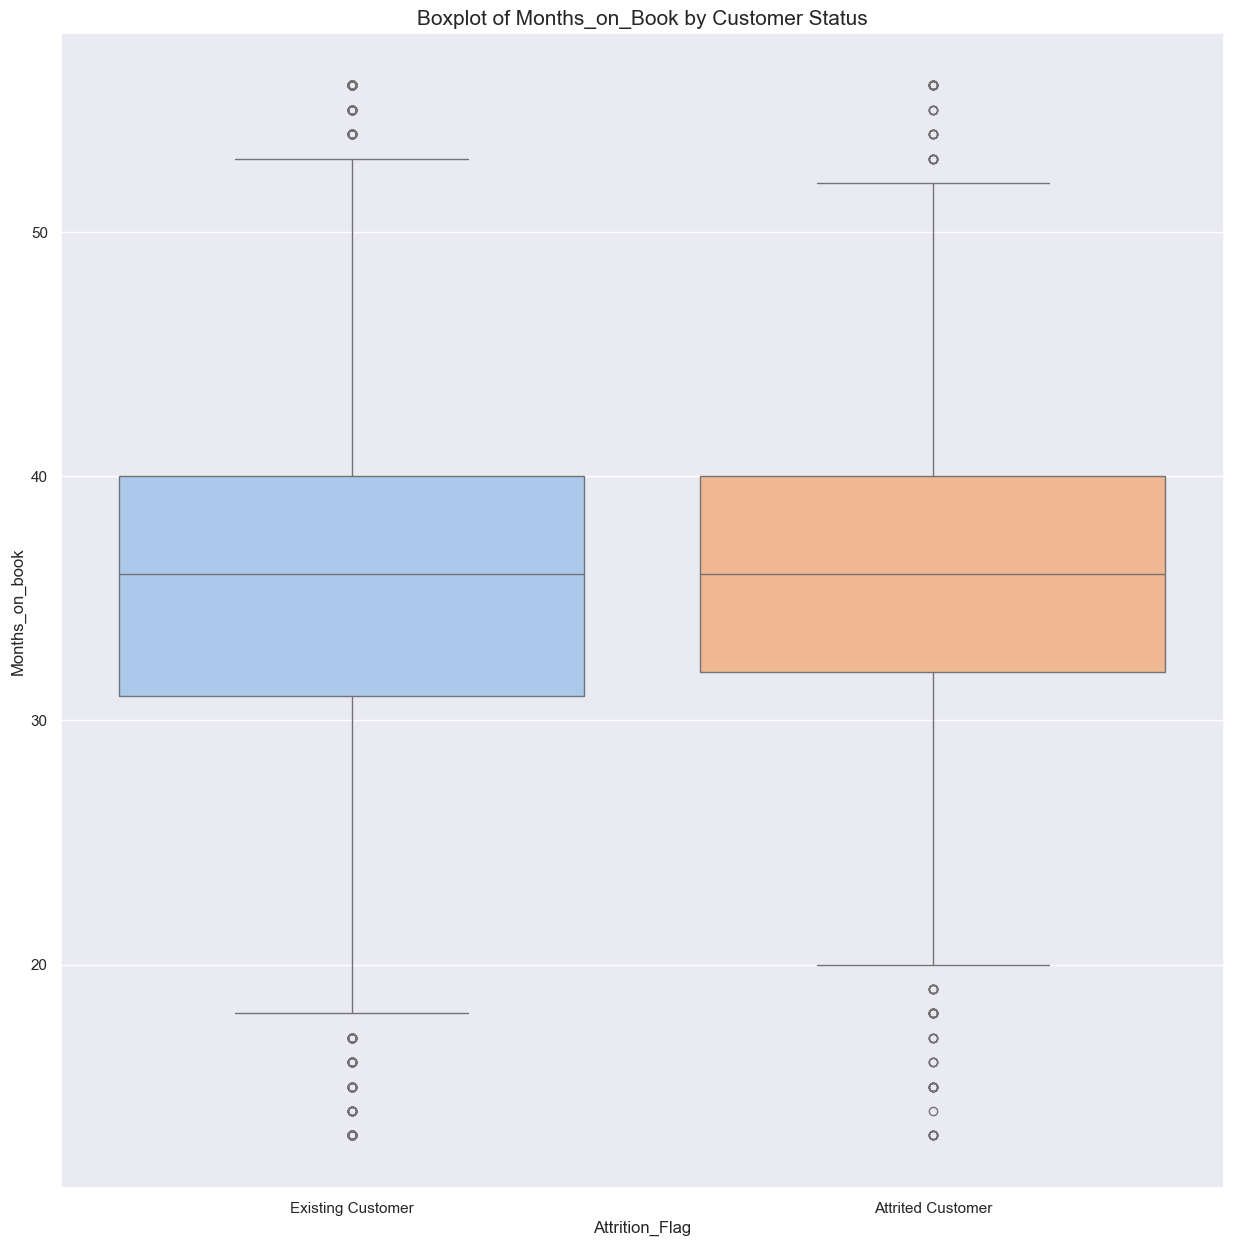

In [160]:
sns.boxplot(x="Attrition_Flag", y="Months_on_book",
            hue="Attrition_Flag", palette='pastel',
            data=df).set_title("Boxplot of Months_on_Book by Customer Status", fontsize=15)

## existing customer, attrited customer에서 분포 차이를 보이는 데이터

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


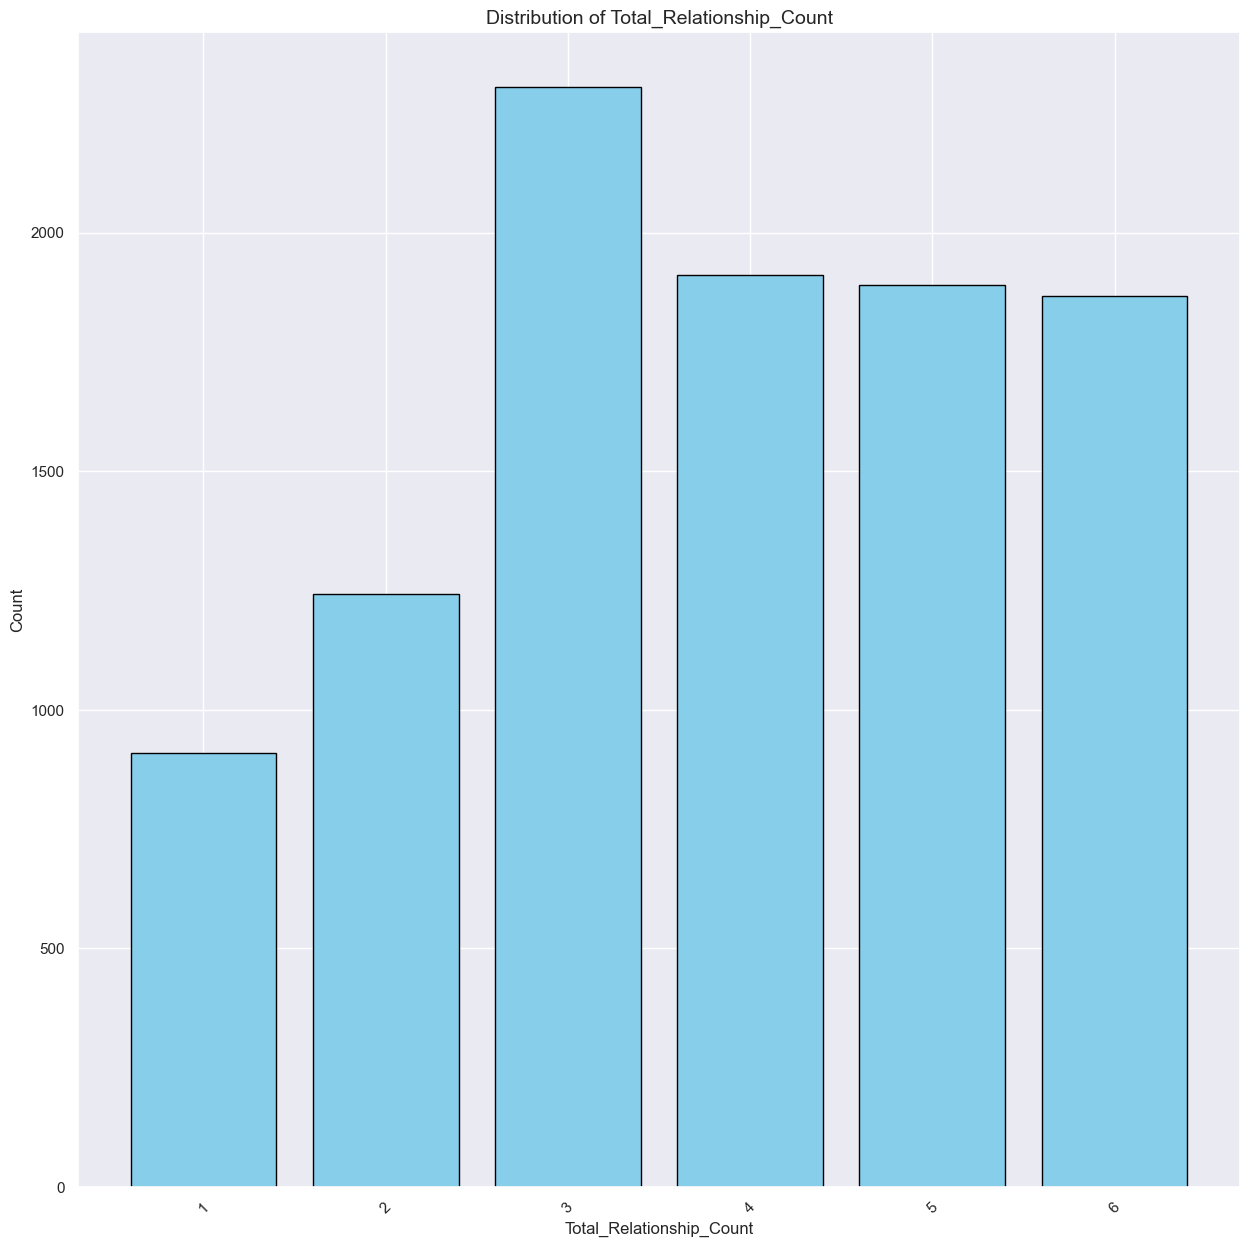

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:23: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


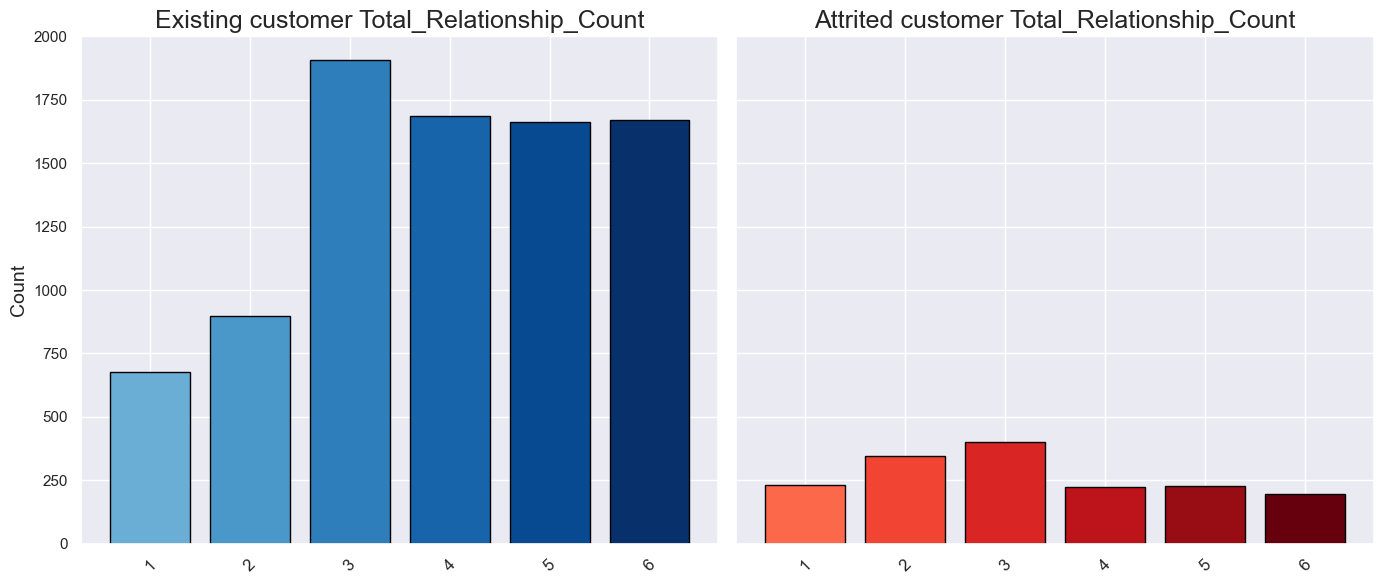

In [161]:
# 이탈하지 않은 고객이 은행의 더 많은 제품을 이용한다.
# 즉 은행생태계에 더 종속되어 있다고도 볼 수 있다.

plot_bar("Total_Relationship_Count")
plot_compare("Total_Relationship_Count")

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


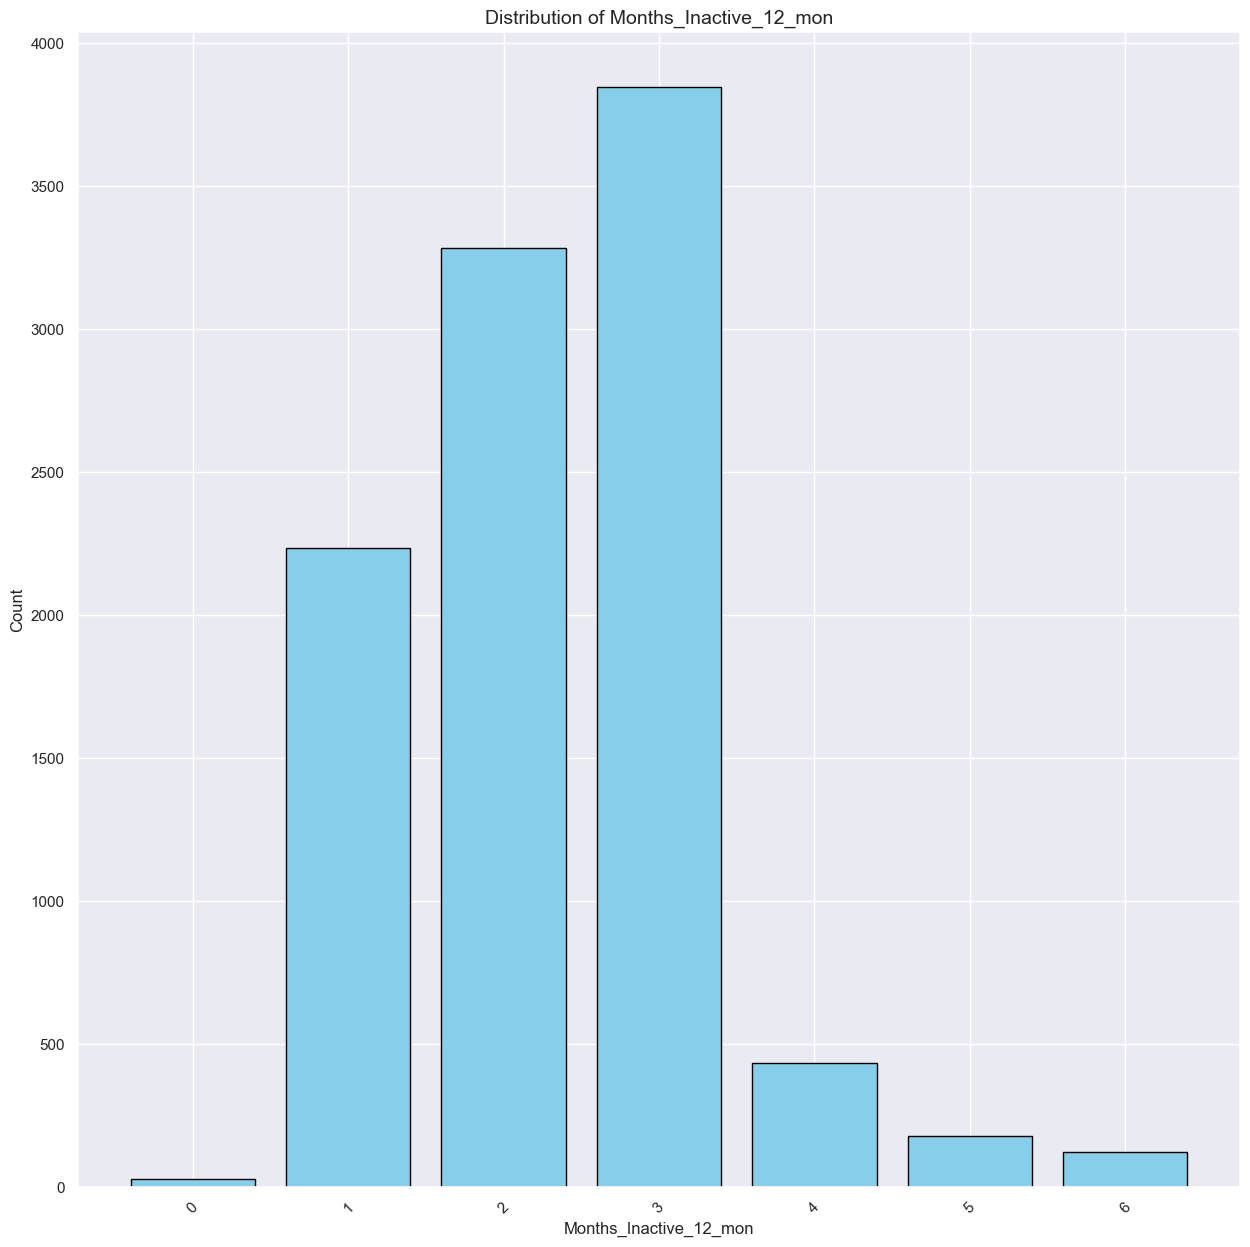

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:23: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


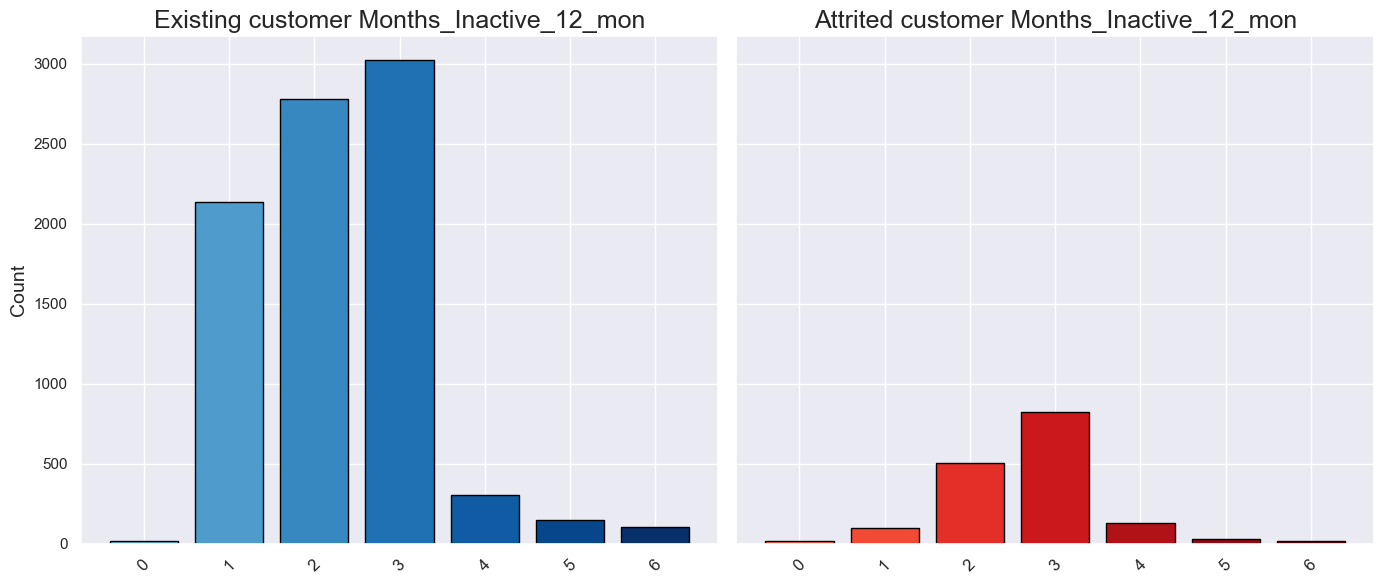

In [162]:
# 3개월 이내에 활성화된 고객은 대부분 이탈하지 않았다.

plot_bar("Months_Inactive_12_mon")
plot_compare("Months_Inactive_12_mon")

Text(0.5, 1.0, 'Boxplot of Inactive_12_mon by Customer Status')

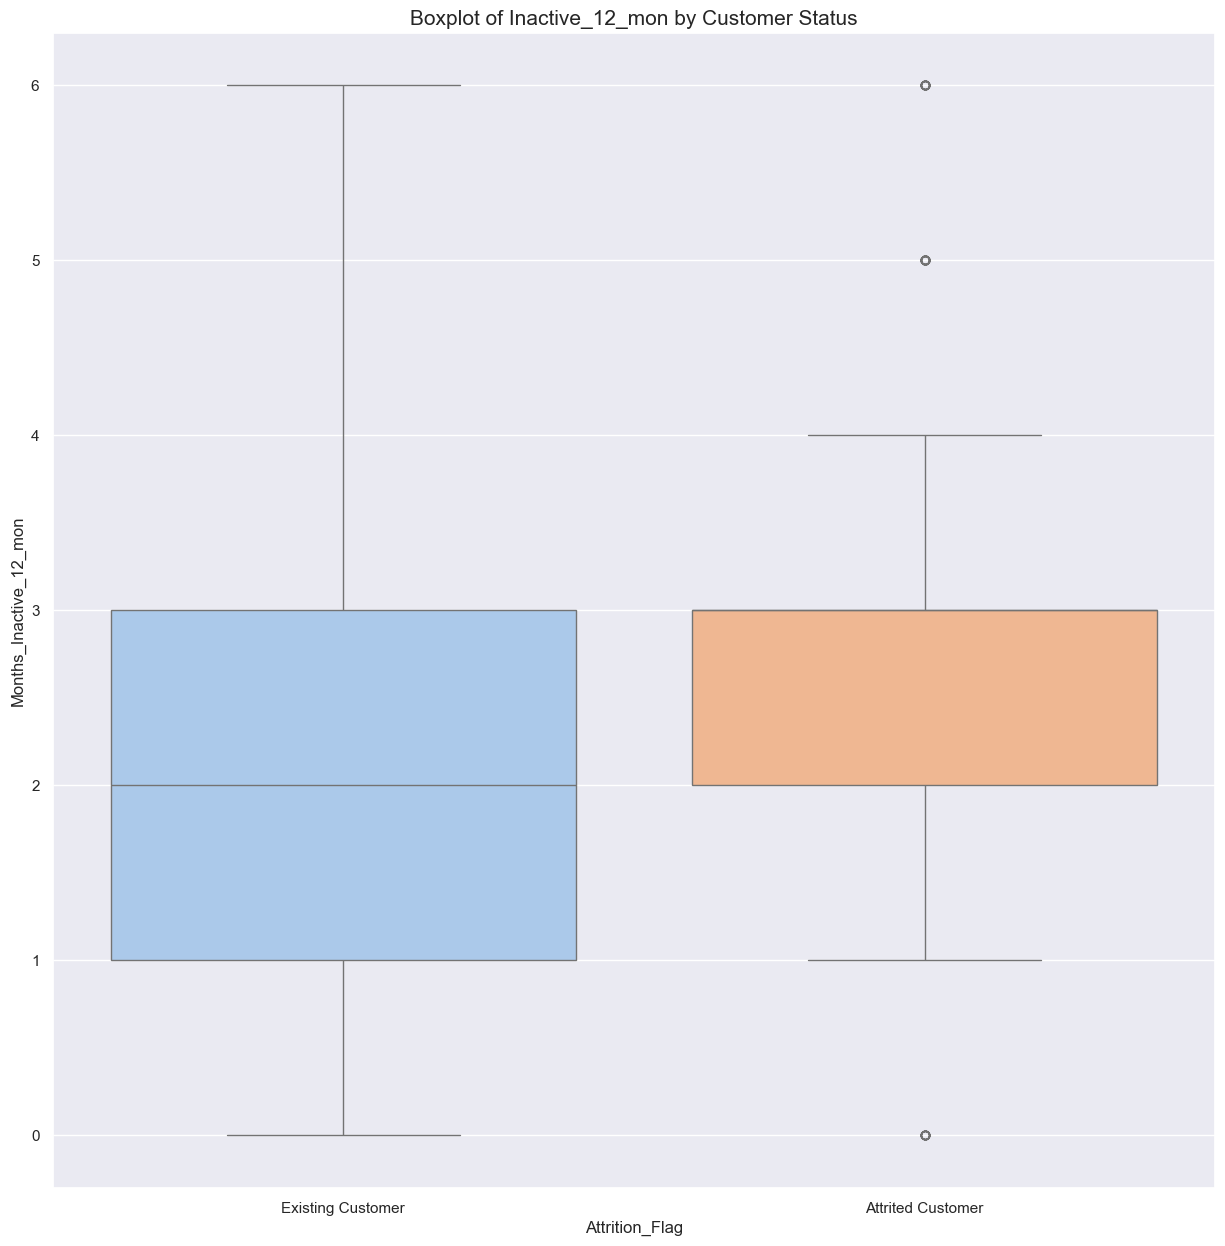

In [163]:
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon",
            hue="Attrition_Flag", palette='pastel',
            data=df).set_title("Boxplot of Inactive_12_mon by Customer Status", fontsize=15)

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


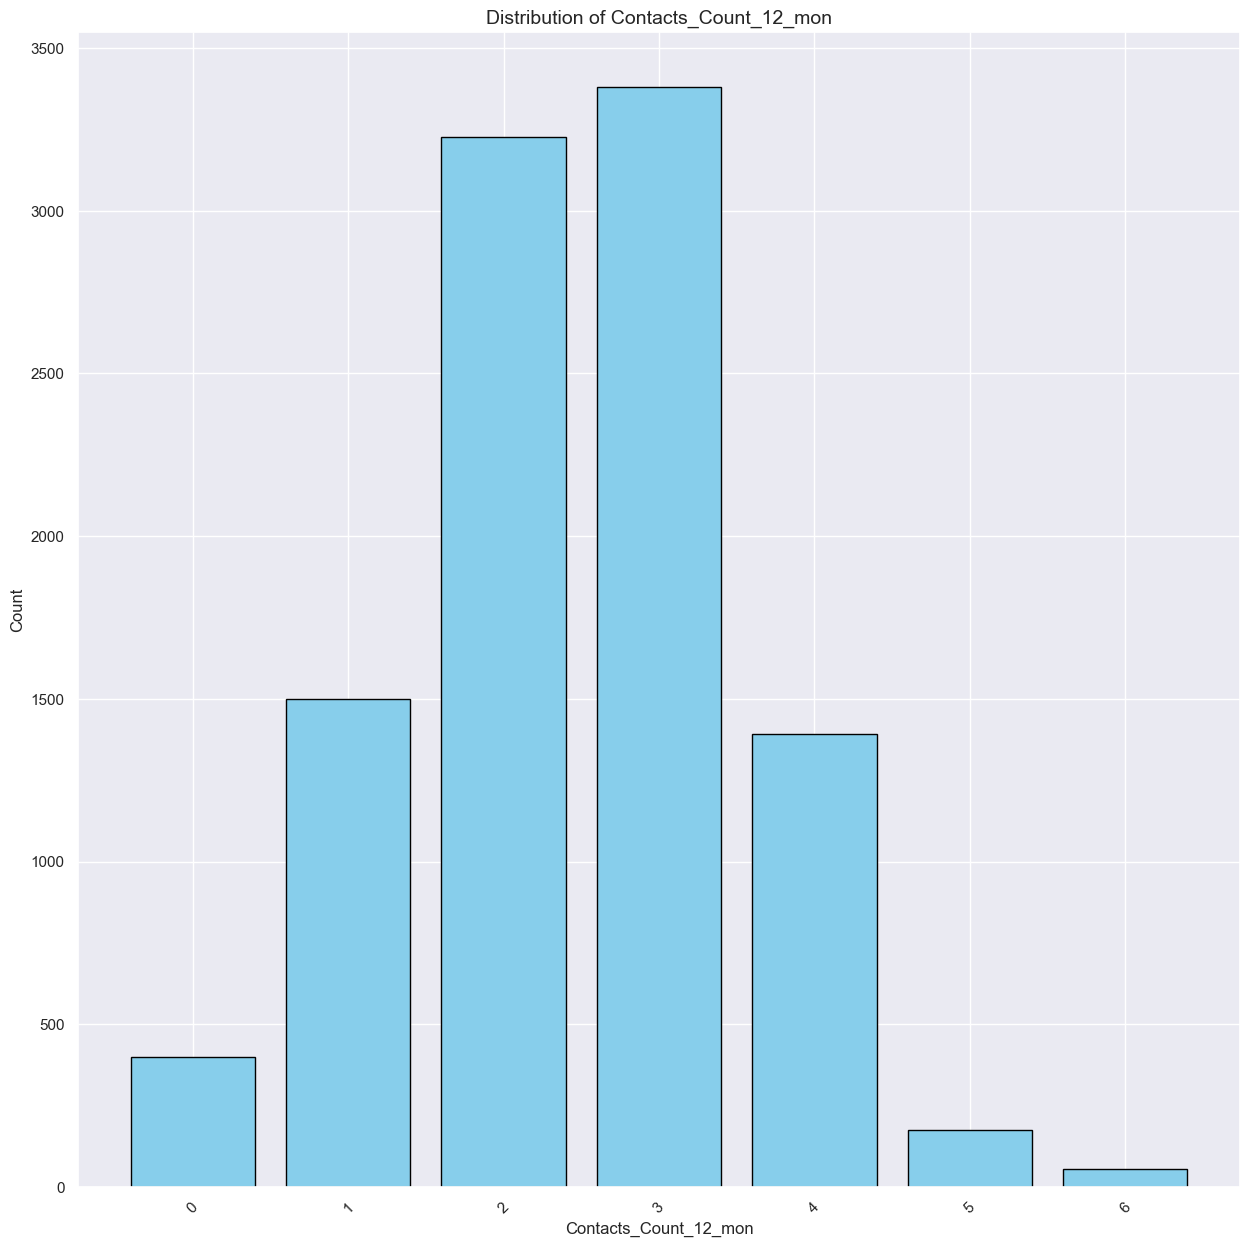

/var/folders/4y/z5096rxj1y12jgh65411zktr0000gn/T/ipykernel_42833/3182129920.py:23: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):


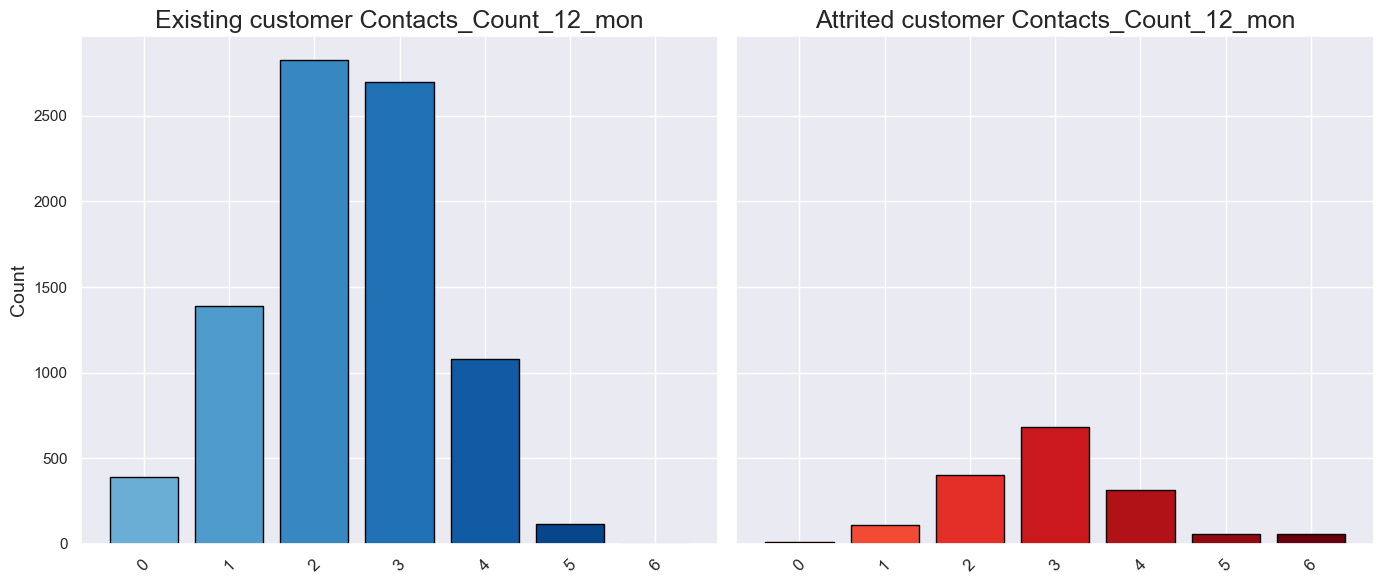

In [164]:
plot_bar("Contacts_Count_12_mon")
plot_compare("Contacts_Count_12_mon")

Text(0.5, 1.0, 'Boxplot of Contacts_Count by customer status')

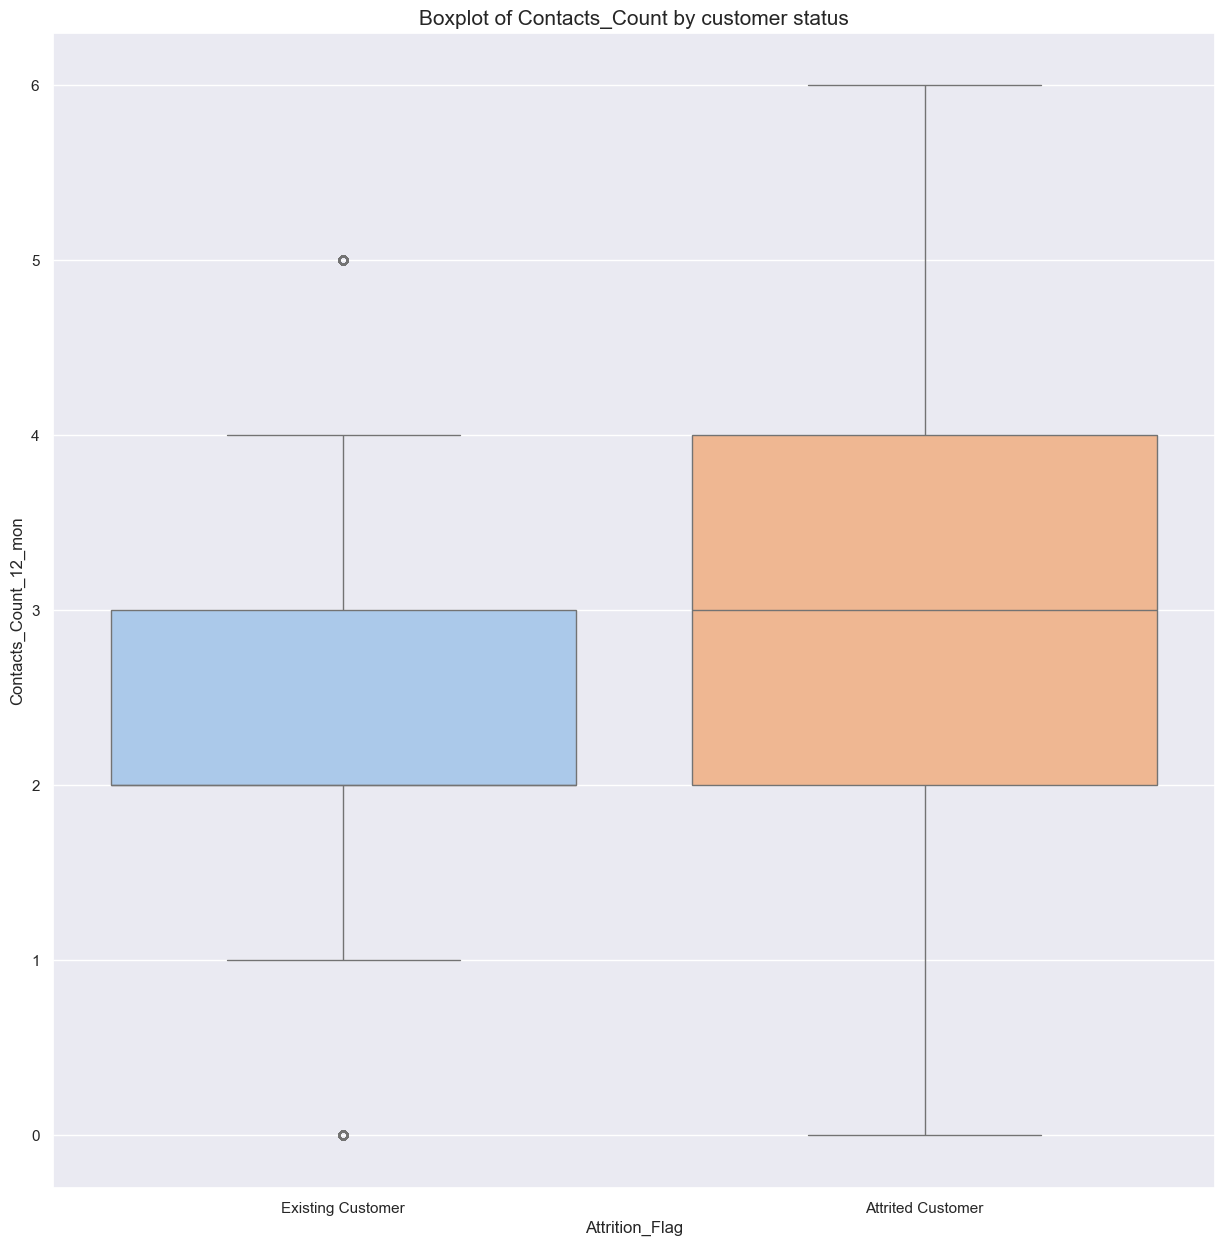

In [165]:
# 주목할만한 특이사항: attrited customer의 연락 횟수가 더 많다.
  
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon",
            hue="Attrition_Flag", palette='pastel',
            data=df).set_title("Boxplot of Contacts_Count by customer status", fontsize=15)

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

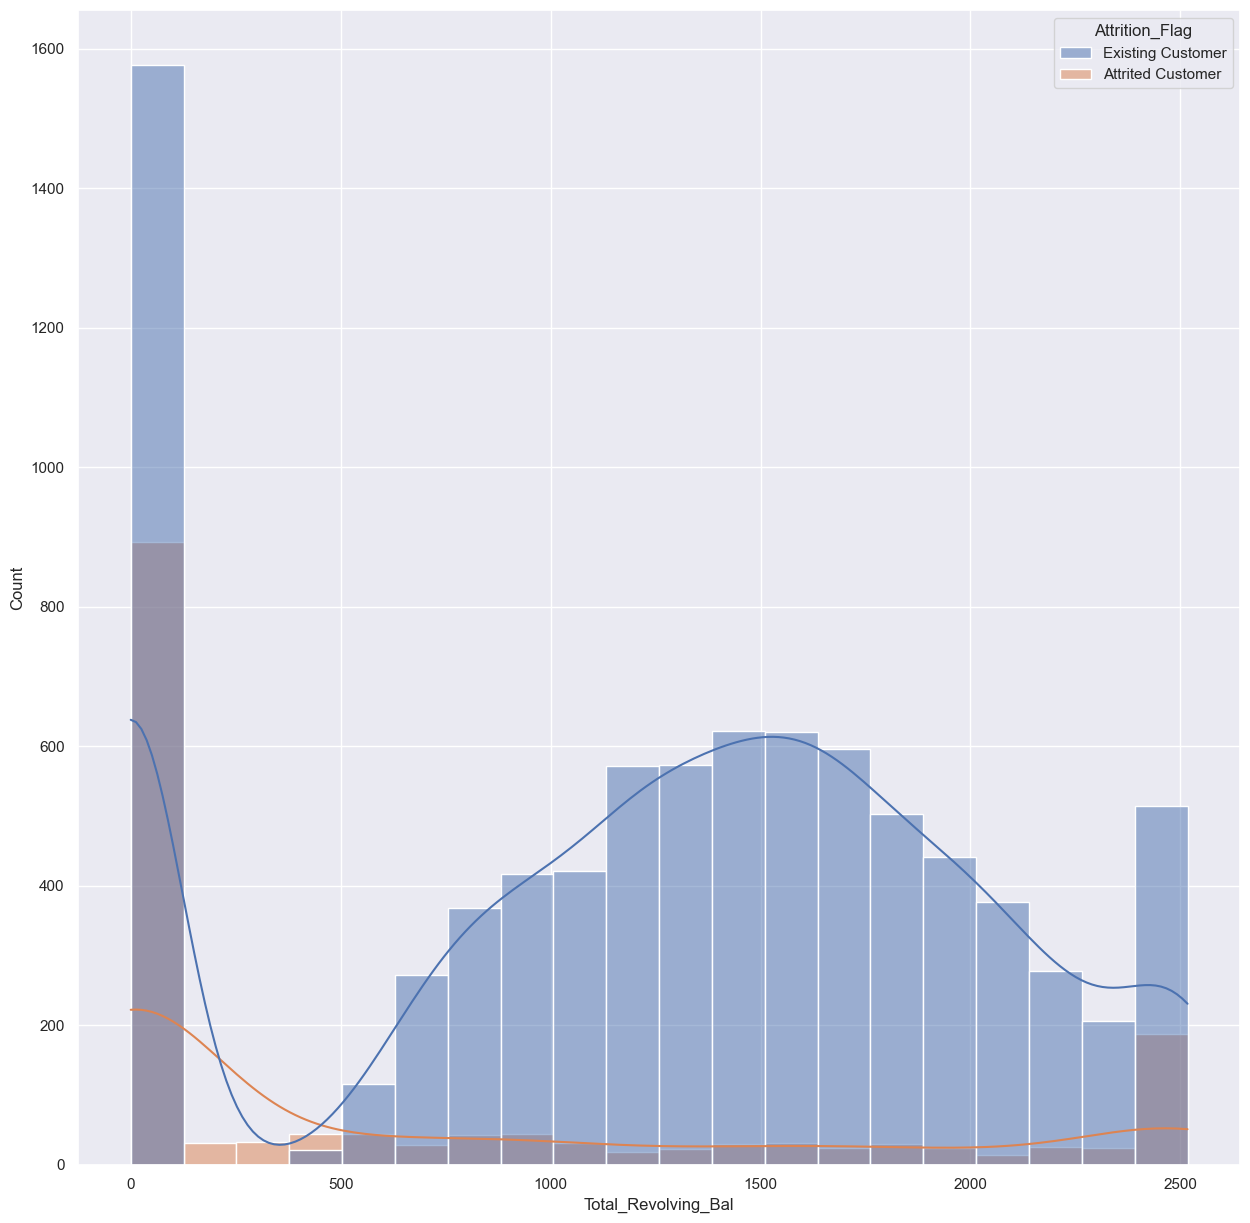

In [166]:
# 이탈한 고객은 revolving balance가 더 낮다
# 참고: revolving balance 의미

"""
The term "revolving balance" is typically used in the context of credit cards and 
refers to the amount of money that you owe on your credit card at any given time.
It's called "revolving" because it can fluctuate up or down depending on how much 
you charge to the card and how much you pay off each month.
"""

sns.histplot(data=df, x="Total_Revolving_Bal", hue="Attrition_Flag", kde=True)

Text(0.5, 1.0, 'Boxplot of Total_Revolving_Bal by customer status')

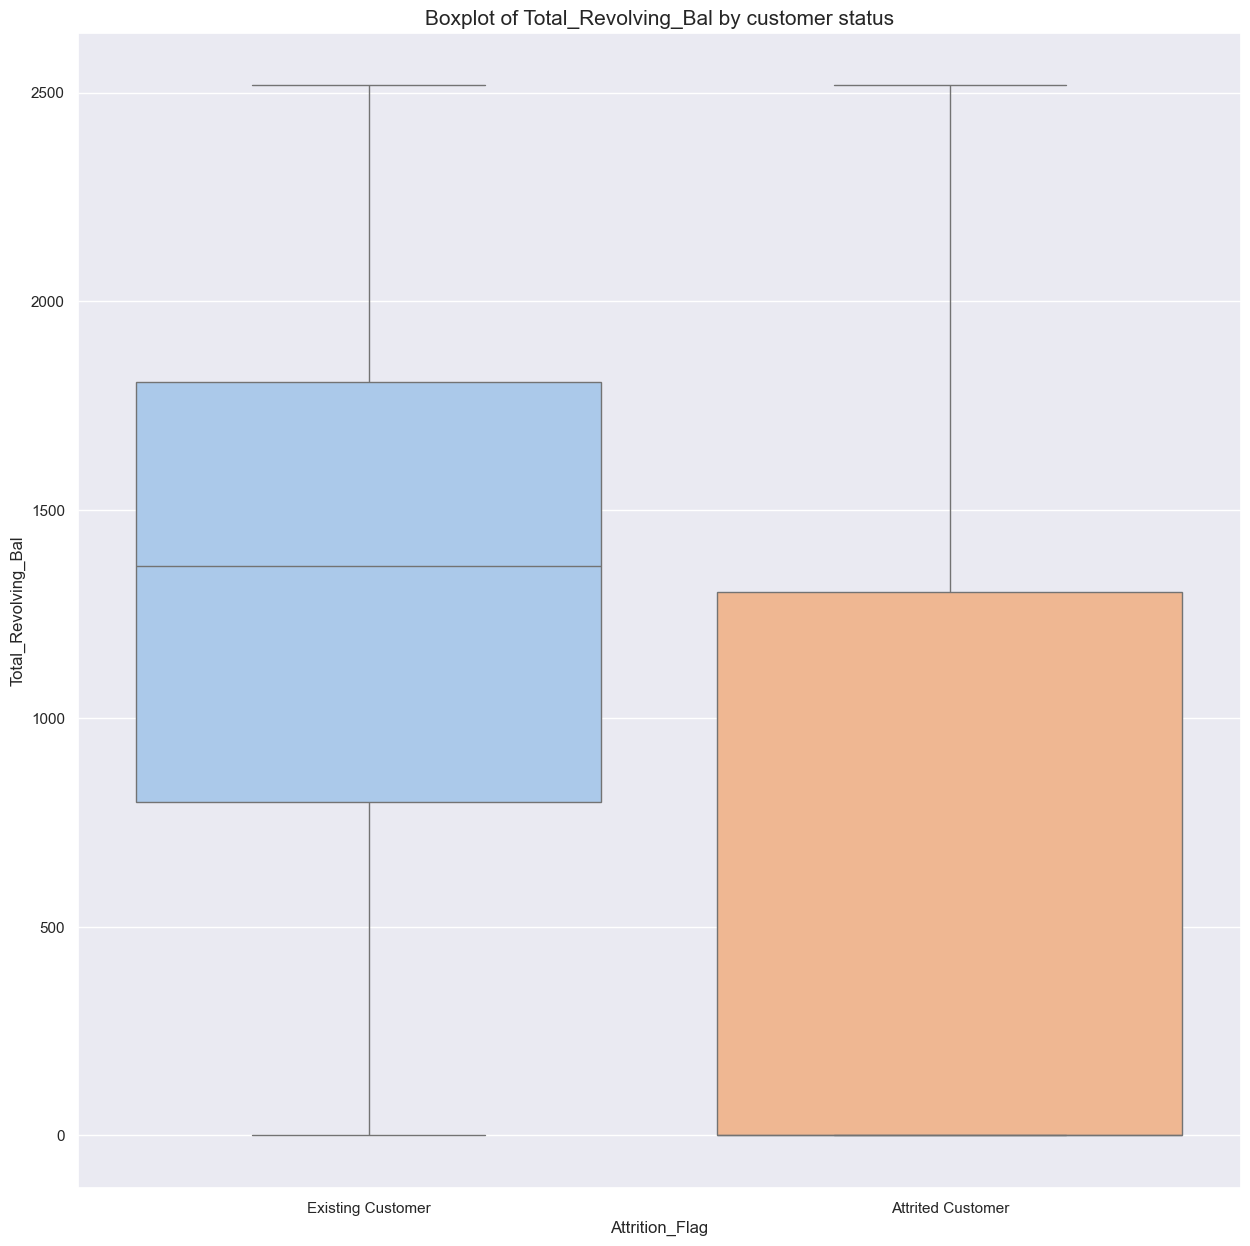

In [167]:
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal",
            hue="Attrition_Flag", palette='pastel',
            data=df).set_title("Boxplot of Total_Revolving_Bal by customer status", fontsize=15)

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

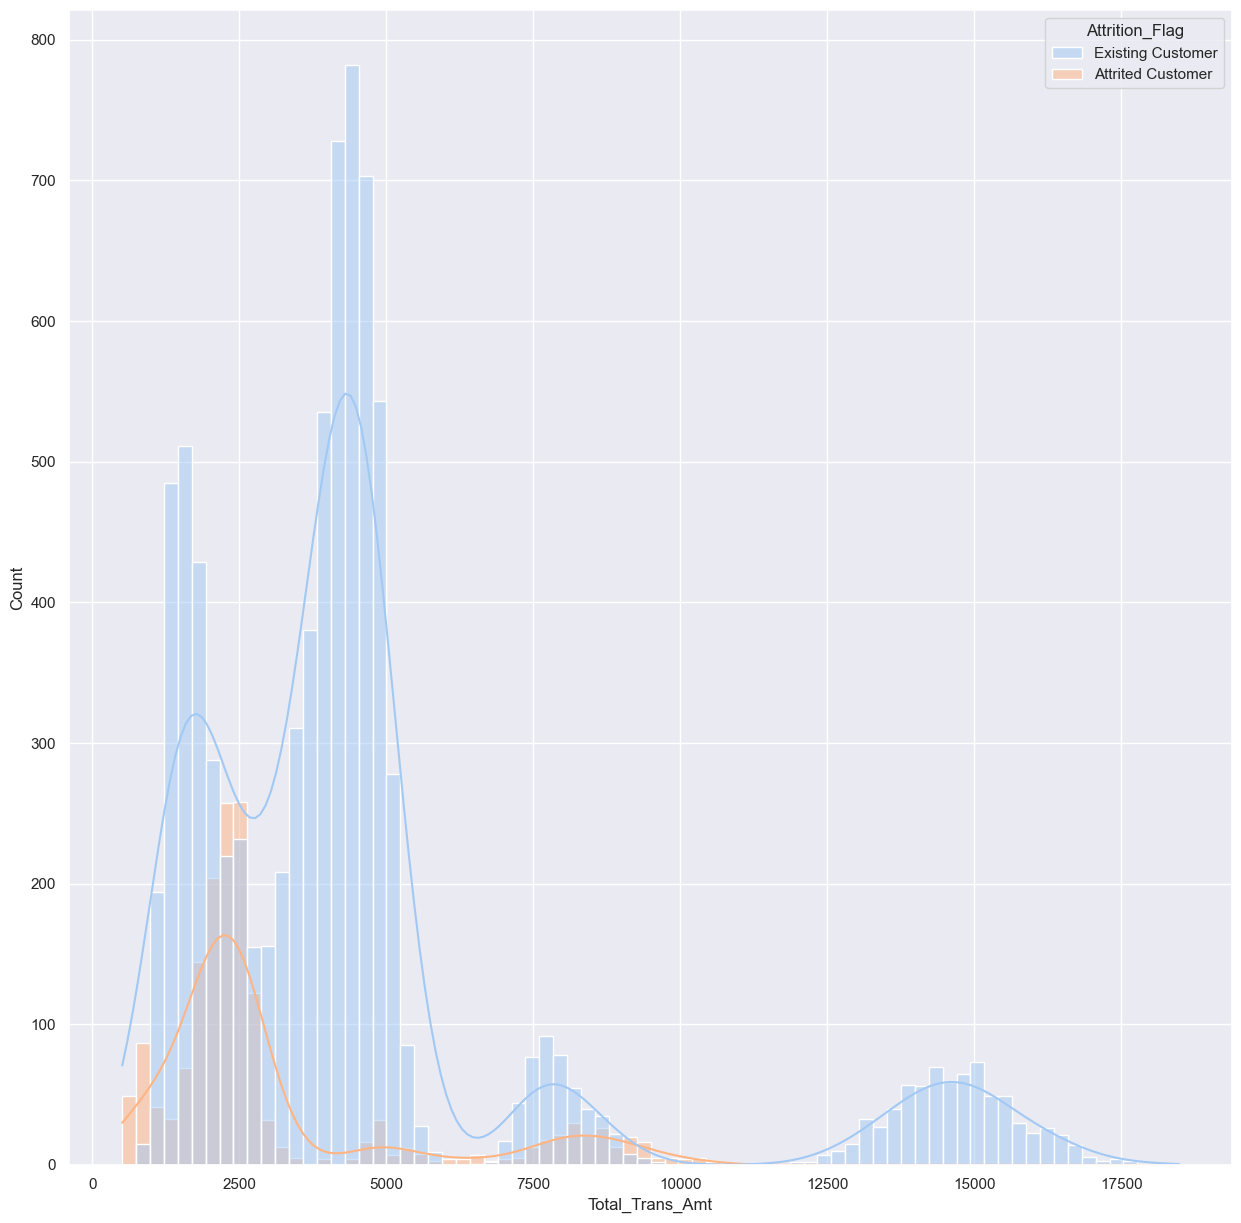

In [168]:
# 이탈 고객의 Total_Trans_Amt가 더 낮다.

sns.histplot(x="Total_Trans_Amt", hue="Attrition_Flag", palette='pastel', data=df, kde=True)

Text(0.5, 1.0, 'Boxplot of Total_Trans_Amt by customer status')

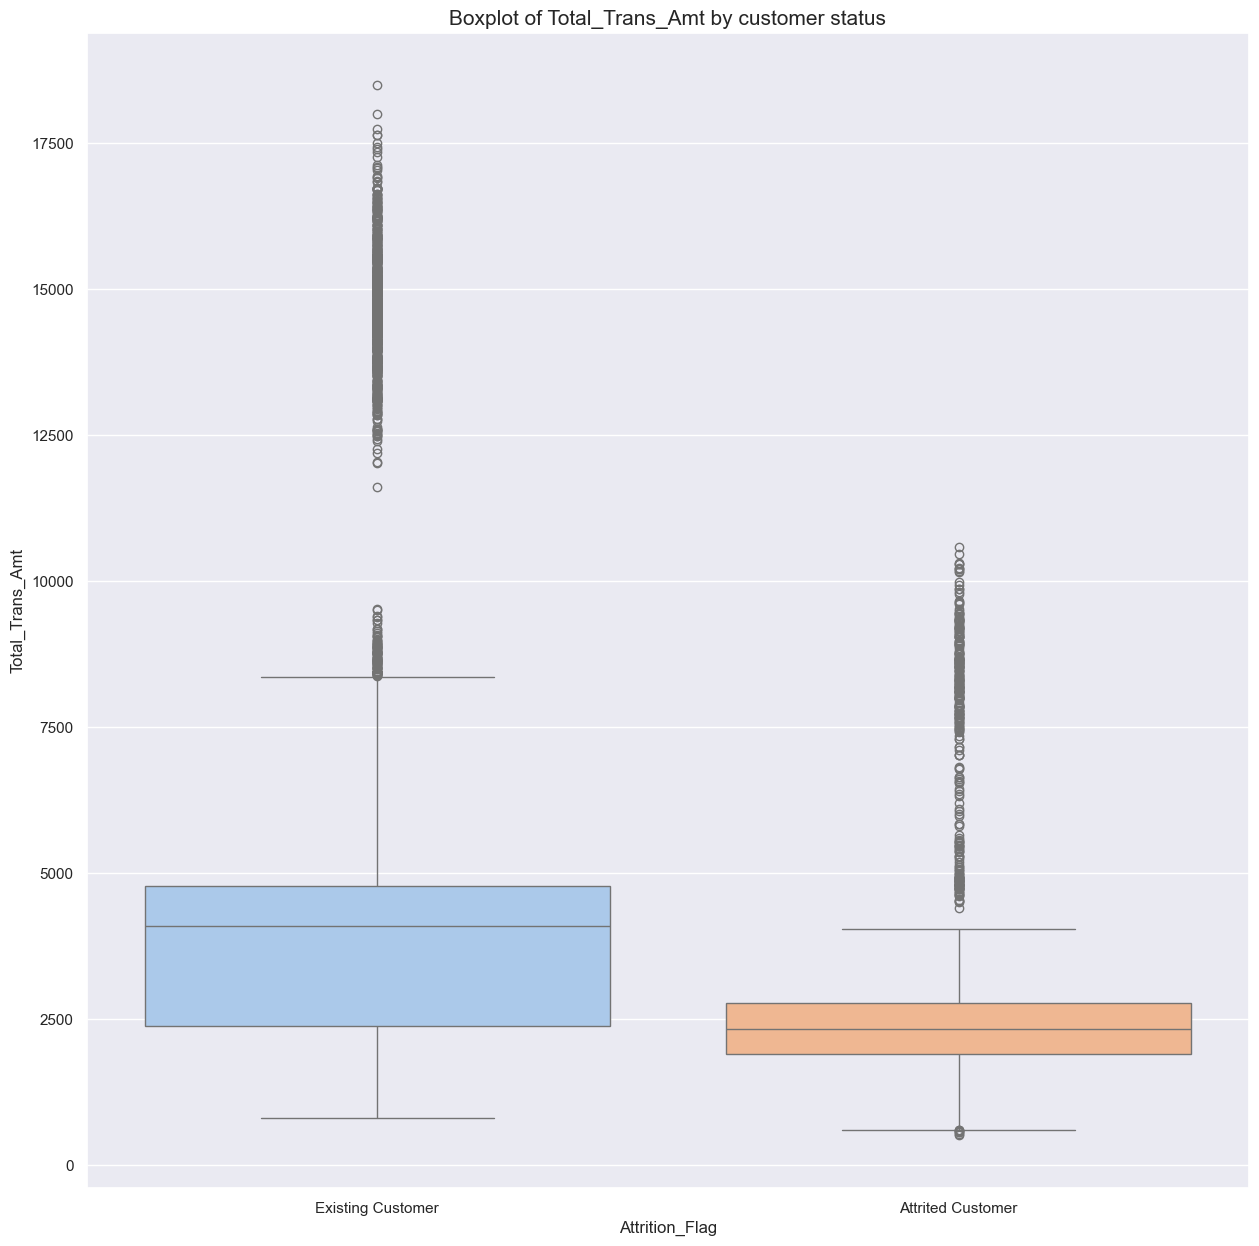

In [169]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt",
            hue="Attrition_Flag", palette='pastel',
            data=df).set_title("Boxplot of Total_Trans_Amt by customer status", fontsize=15)

In [170]:
# TODO: Total_Ct_Chng_Q4_Q1", Total_Trans_CT, Average_Utilization_Ratio 시각화 추가
# 가능하면 통계 statics 추가

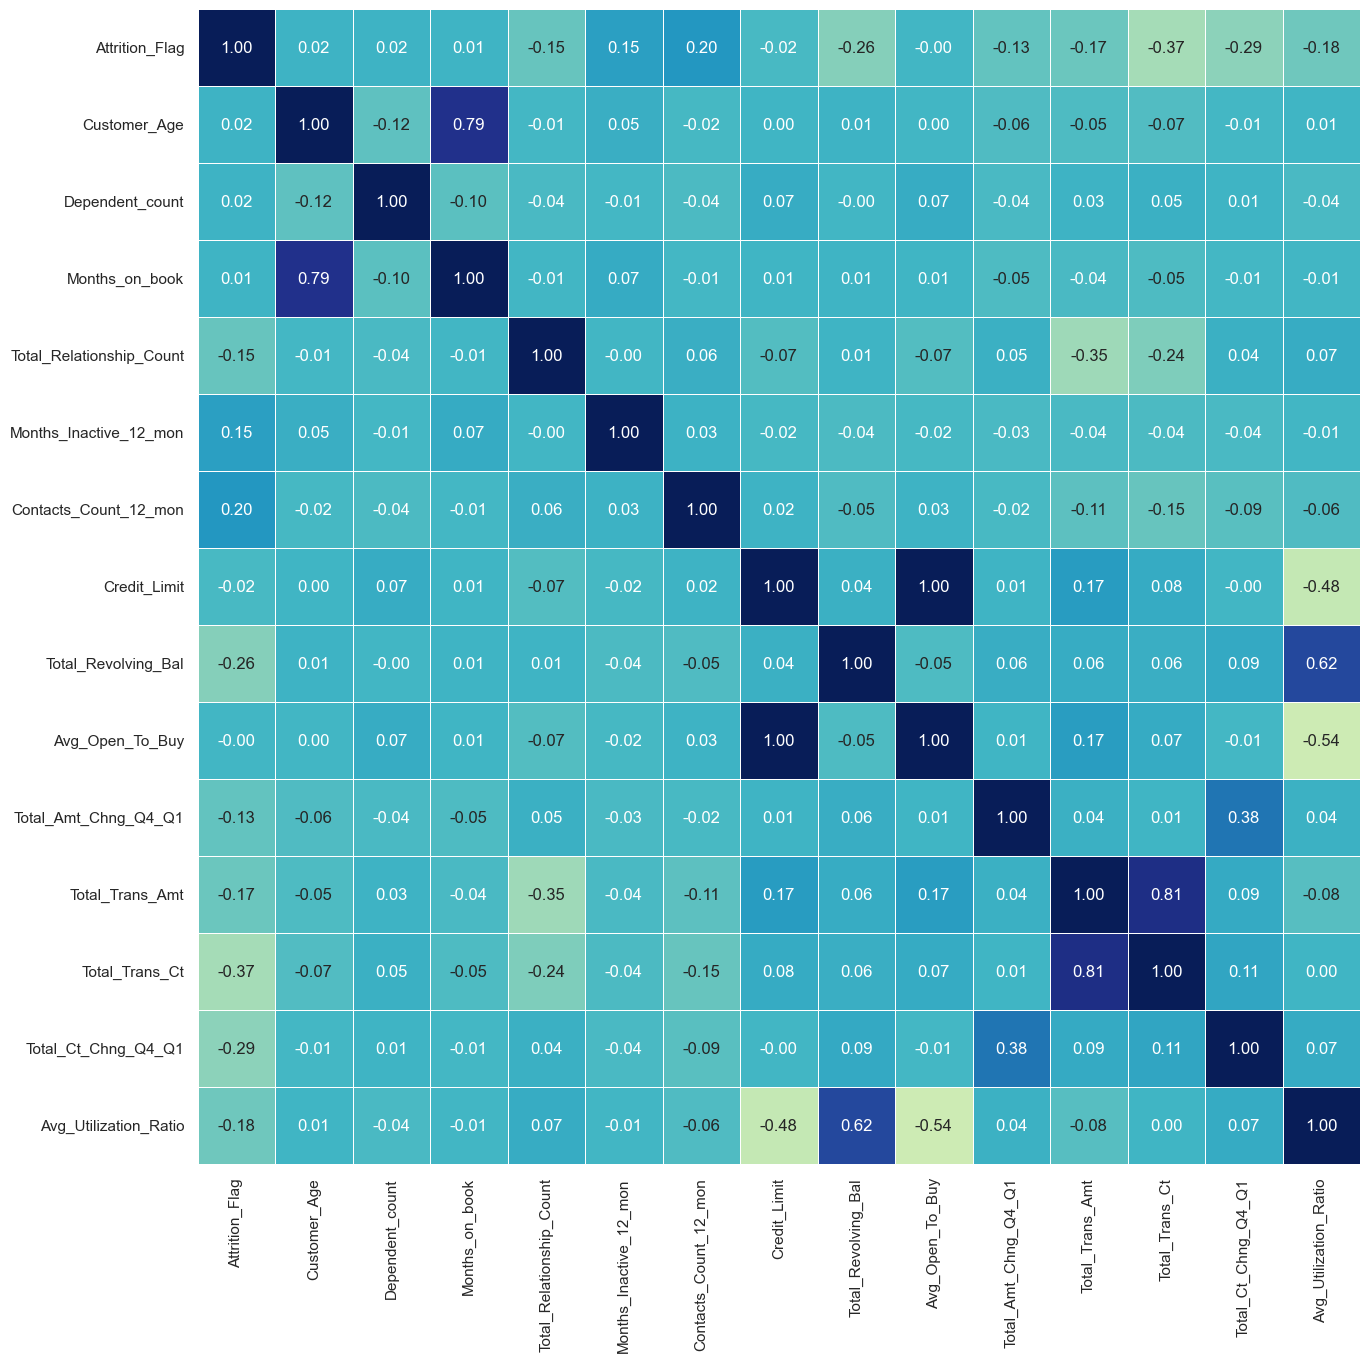

In [171]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
df_clean = df.copy()
df_clean['Attrition_Flag'] = df['Attrition_Flag'].map(codes).astype(int)

extended_cols = num_cols.copy()
extended_cols.insert(0, 'Attrition_Flag')

sns.set_theme(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df_clean[extended_cols].corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f"
)
plt.show()

- Credit Limit과 Average Open to Buy는 100% 상관관계를 가짐
- Months on book과 Customer Age는 상당히 강한 상관관계를 가짐
- Average Utilization Ration과 Total Revolving Balance도 약간의 상관관계를 가짐
- Attrition Flag는 numeric feature과 높은 상관관계를 가지지 않음
- Attrition Flag는 Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit와 높은 상관관계를 가지지 않음.

## 모델 학습

In [185]:
def navie_train(df):
    df_model = df.copy()
    df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map(codes).astype(int)
    
    label_encoder = LabelEncoder()
    for col in cat_cols:
        df_model[col] = label_encoder.fit_transform(df_model[col])
    
    x_train, x_test, y_train, y_test = train_test_split(df_model.drop('Attrition_Flag', axis=1), df_model['Attrition_Flag'], test_size=0.2, random_state=42, stratify=df_model['Attrition_Flag'])
    print(f'Train target proportion: ')
    print(f'{y_train.value_counts(normalize=True)}')
    print(f'\nTest target proportion: ')
    print(f'{y_test.value_counts(normalize=True)}')
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf = rf_clf.fit(x_train, y_train)
    y_pred = rf_clf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("ROC_AUC: ", roc_auc_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("ROC AUC: ", roc_auc_score(y_test, y_pred))
    feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=x_train.columns, columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

    importances = rf_clf.feature_importances_

    feature_names = x_train.columns

    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(x_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
    

Train target proportion: 
Attrition_Flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64

Test target proportion: 
Attrition_Flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64
[[1684   17]
 [  65  260]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.94      0.80      0.86       325

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy:  0.9595261599210266
ROC_AUC:  0.895002939447384
F1 Score:  0.8637873754152824
Precision:  0.9386281588447654
Recall:  0.8
ROC AUC:  0.895002939447384
                          importance
Total_Trans_Amt             0.193559
Total_Trans_Ct              0.160812
Total_Ct_Chng_Q4_Q1         0.115537
Total_Revolving_Bal         0.103020
Avg_Utilization_Ratio       0.070896
Total_Relationship_Count    0.066746
Total_Amt_Chng_Q4_Q1   

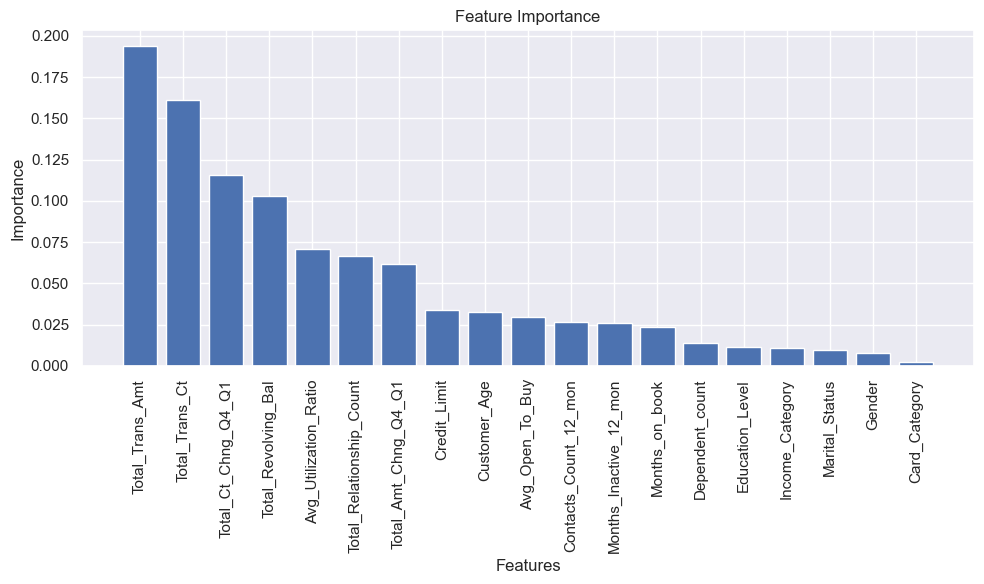

In [186]:
# TODO: Recall, F1 score에 초점
navie_train(df)

[[1676   25]
 [  72  253]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.91      0.78      0.84       325

    accuracy                           0.95      2026
   macro avg       0.93      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Accuracy:  0.9521224086870681
ROC_AUC:  0.8818821507710397
F1 Score:  0.8391376451077943
Precision:  0.9100719424460432
Recall:  0.7784615384615384
ROC AUC:  0.8818821507710397


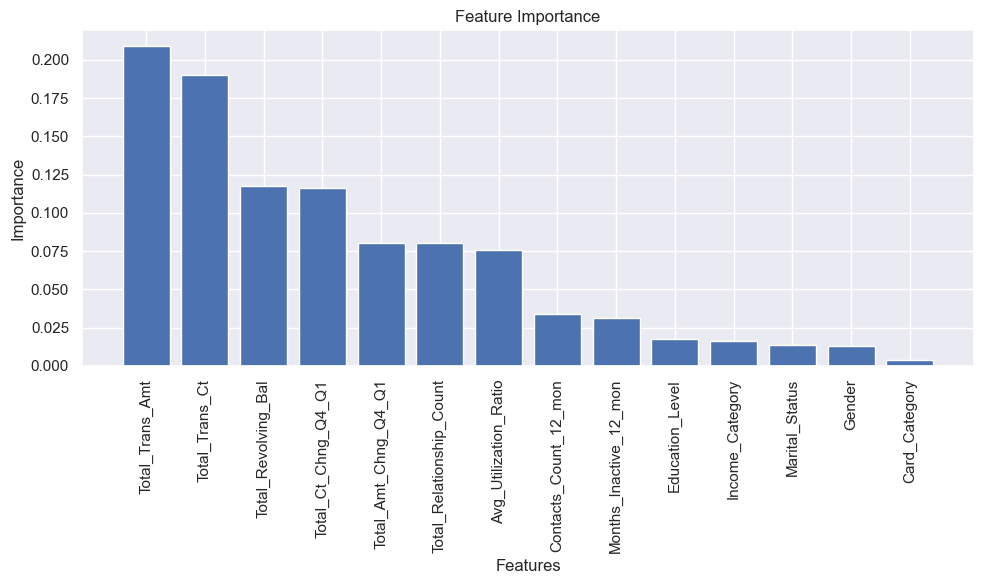

In [188]:
# 향상된 모델

# df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
# df_oh=pd.get_dummies(df_model)
# df_oh['Attrition_Flag'] = df_oh['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})
# list(df_oh.columns)

columns_to_drop = ["Credit_Limit", "Dependent_count", "Months_on_book", "Avg_Open_To_Buy", "Customer_Age"]
df_model= df.drop(columns=columns_to_drop)
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map(codes).astype(int)
lb_encoder = LabelEncoder()
for col in cat_cols:
    if col in columns_to_drop:
        continue
    df_model[col] = lb_encoder.fit_transform(df_model[col])

x_train, x_test, y_train, y_test = train_test_split(df_model.drop('Attrition_Flag', axis=1), df_model['Attrition_Flag'], test_size=0.2, random_state=42, stratify=df_model['Attrition_Flag'])
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC_AUC: ", roc_auc_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

importances = rf_clf.feature_importances_

feature_names = x_train.columns

indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [305]:
columns_to_drop = ["Credit_Limit", "Dependent_count", "Months_on_book", "Avg_Open_To_Buy", "Customer_Age"]
one_hot_encoding_feature = ['Gender']
ordinal_encoding_orders = {
    'Education_Level': ['Uneducated',
                        'High School',
                        'College',
                        'Graduate',
                        'Post-Graduate',
                        'Doctorate',
                        'Unknown'],
    'Income_Category': ['Less than $40K',
                        '$40K - $60K',
                        '$60K - $80K',
                        '$80K - $120K',
                        '$120K +',
                        'Unknown'],
    'Card_Category': ['Blue',
                      'Silver',
                      'Gold',
                      'Platinum']
}
target_encoding_feature = ['Marital_Status']


In [306]:
# # Define Ordinal Encoders with specified orders
# ordinal_enc = OrdinalEncoder(categories=[
#     ordinal_encoding_orders['Education_Level'],
#     ordinal_encoding_orders['Income_Category'],
#     ordinal_encoding_orders['Card_Category']
# ])

# # Initialize OneHotEncoder and TargetEncoder
# one_hot_enc = OneHotEncoder()
# # target_enc = TargetEncoder()


In [307]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('drop', 'drop', columns_to_drop),
#         ('onehot', one_hot_enc, one_hot_encoding_feature),
#         ('ordinal', ordinal_enc, list(ordinal_encoding_orders.keys())),
#         # ('target', target_enc, target_encoding_feature)
#     ],
#     remainder='passthrough'  # This will keep all other columns not specified in the transformer list
# )

In [310]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [311]:
# columns_to_drop = ["Credit_Limit", "Dependent_count", "Months_on_book", "Avg_Open_To_Buy", "Customer_Age"]
# X_train_transformed = X_train.drop(columns=columns_to_drop)

# one_hot_encoding_feature = ['Gender', 'Marital_Status']
# ohe = OneHotEncoder(sparse_output=False, drop='first')  # Using sparse_output instead of sparse
# X_train_transformed_ohe = pd.DataFrame(ohe.fit_transform(X_train_transformed[one_hot_encoding_feature]), columns=ohe.get_feature_names_out(one_hot_encoding_feature))
# X_train_transformed = X_train_transformed.drop(columns=one_hot_encoding_feature).reset_index(drop=True)
# X_train_transformed = pd.concat([X_train_transformed, X_train_transformed_ohe], axis=1)

# ordinal_encoding_orders = {
#     'Education_Level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'],
#     'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'],
#     'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']
# }

# ordinal_features = list(ordinal_encoding_orders.keys())
# ordinal_encoder = OrdinalEncoder(categories=[ordinal_encoding_orders[col] for col in ordinal_features])
# X_train_transformed[ordinal_features] = ordinal_encoder.fit_transform(X_train_transformed[ordinal_features])

# # target_encoding_feature = ['Marital_Status']
# # target_encoder = TargetEncoder(cols=target_encoding_feature)
# # X_train_transformed[target_encoding_feature] = target_encoder.fit_transform(X_train_transformed[target_encoding_feature], )  # y_train is the target variable

# # Display the transformed dataset
# # import ace_tools as tools; tools.display_dataframe_to_user(name="Transformed X_train_transformed Dataset", dataframe=X_train_transformed)

# X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education_Level           8101 non-null   float64
 1   Income_Category           8101 non-null   float64
 2   Card_Category             8101 non-null   float64
 3   Total_Relationship_Count  8101 non-null   int64  
 4   Months_Inactive_12_mon    8101 non-null   int64  
 5   Contacts_Count_12_mon     8101 non-null   int64  
 6   Total_Revolving_Bal       8101 non-null   int64  
 7   Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 8   Total_Trans_Amt           8101 non-null   int64  
 9   Total_Trans_Ct            8101 non-null   int64  
 10  Total_Ct_Chng_Q4_Q1       8101 non-null   float64
 11  Avg_Utilization_Ratio     8101 non-null   float64
 12  Gender_M                  8101 non-null   float64
 13  Marital_Status_Married    8101 non-null   float64
 14  Marital_

In [317]:
df_model = df.copy()
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map(codes).astype(int)

columns_to_drop = ["Credit_Limit", "Dependent_count", "Months_on_book", "Avg_Open_To_Buy", "Customer_Age"]
df_model = df_model.drop(columns=columns_to_drop)

one_hot_encoding_feature = ['Gender']
ohe = OneHotEncoder(sparse_output=False, drop='first')
df_ohe = pd.DataFrame(ohe.fit_transform(df_model[one_hot_encoding_feature]), columns=ohe.get_feature_names_out(one_hot_encoding_feature))
df_model = df_model.drop(columns=one_hot_encoding_feature).reset_index(drop=True)
df_model = pd.concat([df_model, df_ohe], axis=1)

ordinal_encoding_orders = {
    'Education_Level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'],
    'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'],
    'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']
}

ordinal_features = list(ordinal_encoding_orders.keys())
ordinal_encoder = OrdinalEncoder(categories=[ordinal_encoding_orders[col] for col in ordinal_features], handle_unknown='use_encoded_value', unknown_value=-1)
df_model[ordinal_features] = ordinal_encoder.fit_transform(df_model[ordinal_features])

target_encoding_feature = ['Marital_Status']
target_encoder = TargetEncoder(cols=target_encoding_feature)
df_model[target_encoding_feature] = target_encoder.fit_transform(df_model[target_encoding_feature], df_model['Attrition_Flag'])  # Replace 'target_variable' with your actual target column name

df_model.head()

,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M
0,0,1.0,0.151269,2.0,0.0,5,1,3,777,1.335,1144,42,1.625,0.061,1.0
1,0,3.0,0.169414,0.0,0.0,6,1,2,864,1.541,1291,33,3.714,0.105,0.0
2,0,3.0,0.151269,3.0,0.0,4,1,0,0,2.594,1887,20,2.333,0.000,1.0
3,0,1.0,0.172230,0.0,0.0,3,4,1,2517,1.405,1171,20,2.333,0.760,0.0
4,0,0.0,0.151269,2.0,0.0,5,1,0,0,2.175,816,28,2.500,0.000,1.0


In [319]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Attrition_Flag', axis=1), df_model['Attrition_Flag'], test_size=0.2, random_state=42, stratify=df_model['Attrition_Flag'])

In [322]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC_AUC: ", roc_auc_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

[[1674   27]
 [  65  260]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0.91      0.80      0.85       325

    accuracy                           0.95      2026
   macro avg       0.93      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Accuracy:  0.9545903257650543
ROC_AUC:  0.8920634920634921
F1 Score:  0.8496732026143791
Precision:  0.9059233449477352
Recall:  0.8
